# ETHZ: 227-0966-00L
# Quantitative Big Imaging
# March 22, 2018

## Supervised Approaches

# Reading Material

- [Introduction to Machine Learning: ETH Course](https://las.inf.ethz.ch/teaching/introml-s18)
- [Decision Forests for Computer Vision and Medical Image Analysis](https://www.amazon.com/Decision-Computer-Analysis-Advances-Recognition/dp/1447149289/ref=sr_1_1?s=books&ie=UTF8&qid=1521704598&sr=1-1&refinements=p_27%3AAntonio+Criminisi&dpID=41fMCWUOh%252BL&preST=_SY291_BO1,204,203,200_QL40_&dpSrc=srch)
- [U-Net: Convolutional Networks for Biomedical Image Segmentation](https://arxiv.org/abs/1505.04597)
- [U-Net Website](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

# Overview
1. Methods
1. Pipelines
2. Classification
3. Regression
4. Segmentation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.dpi"] = 150
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.style.use('ggplot')
sns.set_style("whitegrid", {'axes.grid': False})

# Basic Methods Overview
There are a number of methods we can use for classification, regression and both. For the simplification of the material we will not make a massive distinction between classification and regression but there are many situations where this is not appropriate. Here we cover a few basic methods, since these are important to understand as a starting point for solving difficult problems. The list is not complete and importantly Support Vector Machines are completely missing which can be a very useful tool in supervised analysis.
A core idea to supervised models is they have a training phase and a predicting phase. 
## Training

The training phase is when the parameters of the model are *learned* and involve putting inputs into the model and updating the parameters so they better match the outputs. This is a sort-of curve fitting (with linear regression it is exactly curve fitting).

## Predicting

The predicting phase is once the parameters have been set applying the model to new datasets. At this point the parameters are no longer adjusted or updated and the model is frozen. Generally it is not possible to tweak a model any more using new data but some approaches (most notably neural networks) are able to handle this. 

x         y  group_id
45  5.481257 -7.533075         0
74  8.149263 -7.057416         0
33  7.692387 -7.382755         0
19 -2.410624  2.432310         2
69  7.696356 -3.325077         1

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


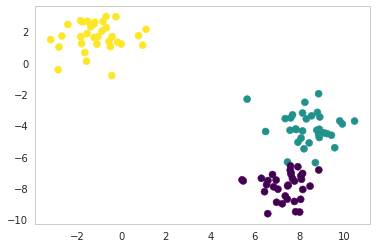

In [2]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(n_samples = 100, 
                                    random_state = 2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, 
            c = test_pts.group_id, 
            cmap = 'viridis')
test_pts.sample(5)

## Nearest Neighbor (or K Nearest Neighbors)
The technique is as basic as it sounds, it basically finds the nearest point to what you have put in. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
k_class = KNeighborsClassifier(1)
k_class.fit(X = np.reshape([0, 1, 2, 3], (-1, 1)),
           y = ['I', 'am', 'a', 'dog'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [4]:
print(k_class.predict(np.reshape([0, 1, 2, 3], 
                                 (-1, 1))))

['I' 'am' 'a' 'dog']


In [5]:
print(k_class.predict(np.reshape([1.5], (1, 1))))
print(k_class.predict(np.reshape([100], (1, 1))))

['am']
['dog']


x         y  group_id
63  -0.683549  2.228374         2
33   7.737789 -6.852065         0
2   -2.425924  3.396227         2
41  11.733747 -3.937691         1
73  -2.586127  1.496725         2

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


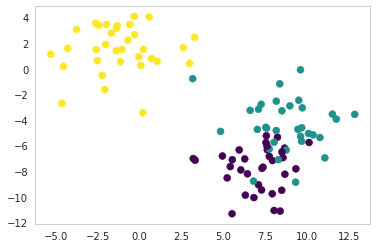

In [6]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(n_samples = 100, 
                                    cluster_std = 2.0,
                                    random_state = 2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
test_pts.sample(5)

In [7]:
k_class = KNeighborsClassifier(1)
k_class.fit(test_pts[['x', 'y']], test_pts['group_id'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


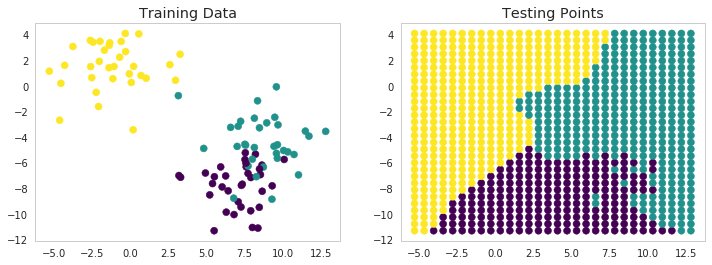

In [8]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 30),
                        np.linspace(test_pts.y.min(), test_pts.y.max(), 30),
                        indexing = 'ij'
                       )
grid_pts = pd.DataFrame(dict(x = xx.ravel(), y = yy.ravel()))
grid_pts['predicted_id'] = k_class.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c = grid_pts.predicted_id, cmap = 'viridis')
ax2.set_title('Testing Points');

# Stabilizing Results
We can see here that the result is thrown off by single points, we can improve by using more than the nearest neighbor and include the average of the nearest 2 neighbors

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


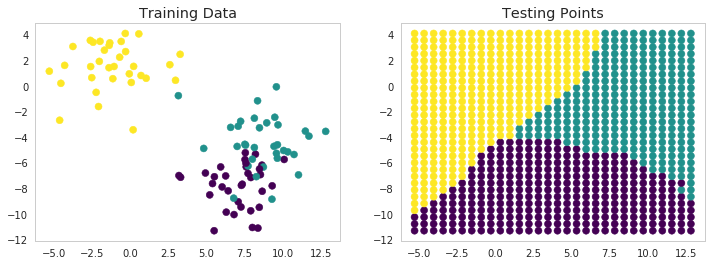

In [9]:
k_class = KNeighborsClassifier(4)
k_class.fit(test_pts[['x', 'y']], test_pts['group_id'])
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 30),
                        np.linspace(test_pts.y.min(), test_pts.y.max(), 30),
                        indexing = 'ij'
                       )
grid_pts = pd.DataFrame(dict(x = xx.ravel(), y = yy.ravel()))
grid_pts['predicted_id'] = k_class.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c = grid_pts.predicted_id, cmap = 'viridis')
ax2.set_title('Testing Points');

## Linear Regression
Linear regression is a fancy-name for linear curve fitting, fitting a line through points (sometimes in more than one dimension). It is a very basic method, but is easy to understand, interpret and fast to compute

In [10]:
from sklearn.linear_model import LinearRegression
import numpy as np
l_reg = LinearRegression()
l_reg.fit(X = np.reshape([0, 1, 2, 3], (-1, 1)),
           y = [10, 20, 30, 40])
l_reg.coef_, l_reg.intercept_

(array([10.]), 10.0)

In [11]:
print(l_reg.predict(np.reshape([0, 1, 2, 3], (-1, 1))))
print(100, '->', l_reg.predict(np.reshape([-100], (1,1))))
print(500, '->', l_reg.predict(np.reshape([500], (1,1))))

[10. 20. 30. 40.]
100 -> [-990.]
500 -> [5010.]


x         y  group_id
75  8.816862 -3.167272         1
38  7.834443 -3.383261         1
19  8.212069 -5.487216         1
15  8.715819 -4.644777         1
13  7.504196 -7.803367         0

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


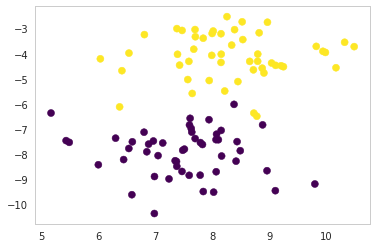

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(centers = 2, n_samples = 100, 
                                    random_state = 2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
test_pts.sample(5)

In [13]:
l_reg = LinearRegression()
l_reg.fit(test_pts[['x', 'y']], test_pts['group_id']) 
print('Slope', l_reg.coef_)
print('Offset', l_reg.intercept_)

Slope [0.04813137 0.20391973]
Offset 1.346929708594462


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


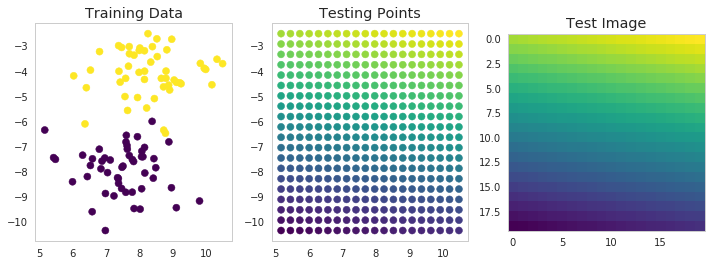

In [14]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                        np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                        indexing = 'ij'
                       )
grid_pts = pd.DataFrame(dict(x = xx.ravel(), y = yy.ravel()))
grid_pts['predicted_id'] = l_reg.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4))
ax1.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c = grid_pts.predicted_id, cmap = 'viridis')
ax2.set_title('Testing Points')
ax3.imshow(grid_pts.predicted_id.values.reshape(xx.shape).T[::-1], cmap = 'viridis')
ax3.set_title('Test Image');

## Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
d_tree = DecisionTreeClassifier()
d_tree.fit(X = np.reshape([0, 1, 2, 3], (-1, 1)),
           y = [0, 1, 0, 1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

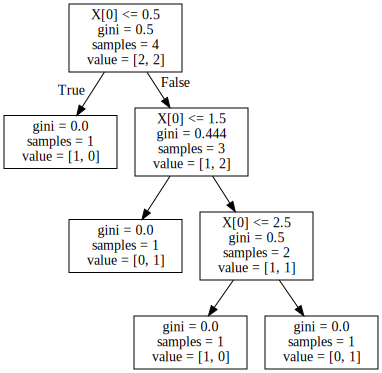

In [16]:
from sklearn.tree import export_graphviz
import graphviz
def show_tree(in_tree):
    return graphviz.Source(export_graphviz(in_tree, out_file = None))
show_tree(d_tree)

x         y  group_id
76  5.654111 -2.323479         1
14  7.858368 -4.255955         1
18 -1.061213  1.651661         2
17  7.504196 -7.803367         0
54  8.157207 -8.078576         0

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


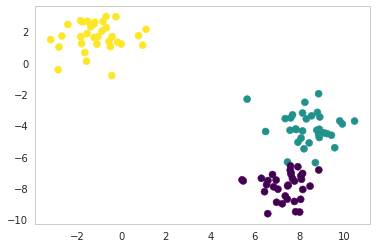

In [17]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(n_samples = 100, 
                                    random_state = 2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
test_pts.sample(5)

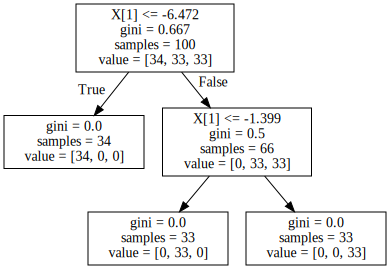

In [18]:
d_tree = DecisionTreeClassifier()
d_tree.fit(test_pts[['x', 'y']], 
           test_pts['group_id'])
show_tree(d_tree)

Text(0.5,1,'Testing Points')

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


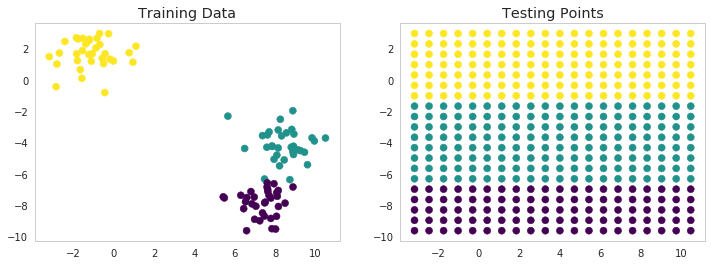

In [19]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                        np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                        indexing = 'ij'
                       )
grid_pts = pd.DataFrame(dict(x = xx.ravel(), y = yy.ravel()))
grid_pts['predicted_id'] = d_tree.predict(grid_pts[['x', 'y']])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
ax1.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c = grid_pts.predicted_id, cmap = 'viridis')
ax2.set_title('Testing Points')

## Forests
Forests are basically the idea of taking a number of trees and bringing them together. So rather than taking a single tree to do the classification, you divide the samples and the features to make different trees and then combine the results. One of the more successful approaches is called [Random Forests](https://en.wikipedia.org/wiki/Random_forest) or as a [video](https://www.youtube.com/watch?v=loNcrMjYh64)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


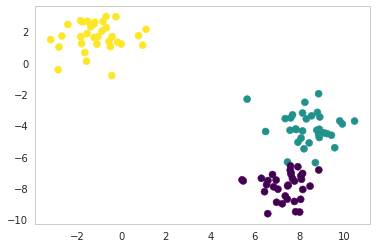

In [20]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
blob_data, blob_labels = make_blobs(n_samples = 100, 
                                    random_state = 2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels
plt.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier(n_estimators = 2, random_state = 2018)
rf_class.fit(test_pts[['x', 'y']], 
           test_pts['group_id'])
print('Build ', len(rf_class.estimators_), 'decision trees')

Build  2 decision trees


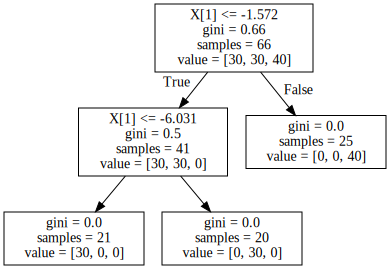

In [22]:
show_tree(rf_class.estimators_[0])

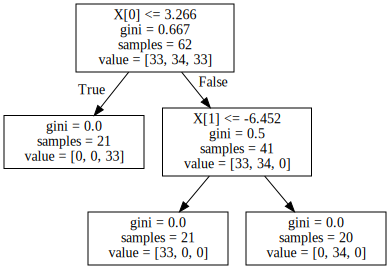

In [23]:
show_tree(rf_class.estimators_[1])

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


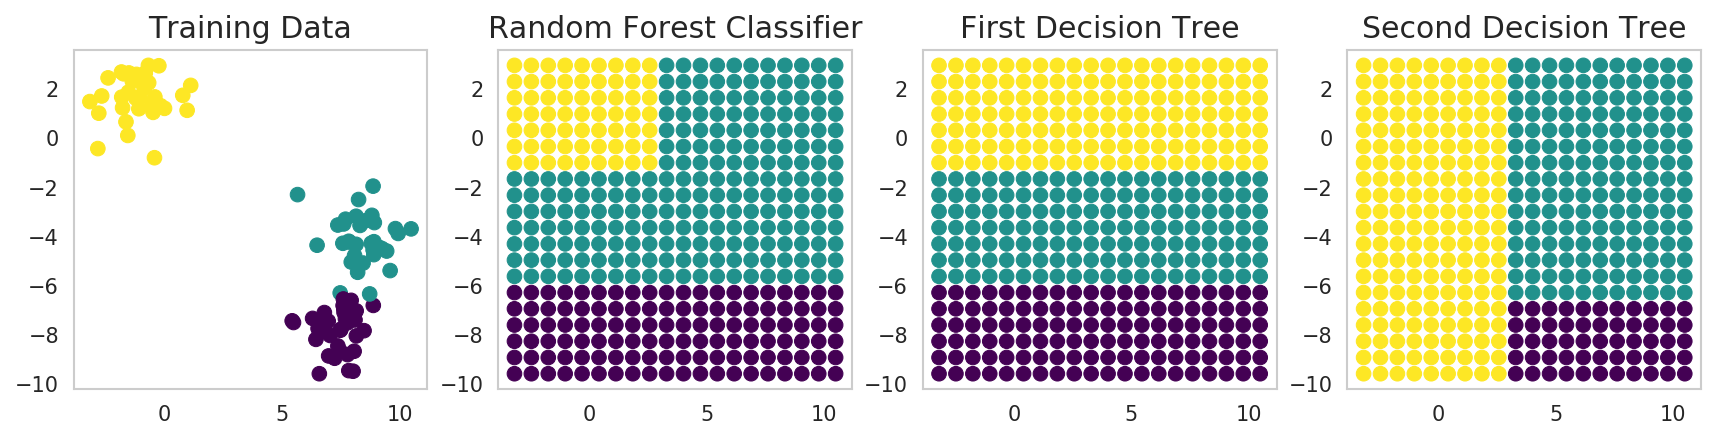

In [24]:
xx, yy = np.meshgrid(np.linspace(test_pts.x.min(), test_pts.x.max(), 20),
                        np.linspace(test_pts.y.min(), test_pts.y.max(), 20),
                        indexing = 'ij'
                       )
grid_pts = pd.DataFrame(dict(x = xx.ravel(), y = yy.ravel()))

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (14, 3), dpi = 150)
ax1.scatter(test_pts.x, test_pts.y, c = test_pts.group_id, cmap = 'viridis')
ax1.set_title('Training Data')
ax2.scatter(grid_pts.x, grid_pts.y, c = rf_class.predict(grid_pts[['x', 'y']]), cmap = 'viridis')
ax2.set_title('Random Forest Classifier')

ax3.scatter(grid_pts.x, grid_pts.y, c = rf_class.estimators_[0].predict(grid_pts[['x', 'y']]), cmap = 'viridis')
ax3.set_title('First Decision Tree')

ax4.scatter(grid_pts.x, grid_pts.y, c = rf_class.estimators_[1].predict(grid_pts[['x', 'y']]), cmap = 'viridis')
ax4.set_title('Second Decision Tree');

# Pipelines

We will use the idea of pipelines generically here to refer to the combination of steps that need to be performed to solve a problem. 

In [25]:
%%file pipe_utils.py
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d


def display_data(in_ax, raw_data, show_hist):
    if (raw_data.shape[0] == 1) and (len(raw_data.shape) == 4):
        # reformat channels first
        in_data = raw_data[0].swapaxes(0, 2).swapaxes(1, 2)
    else:
        in_data = np.squeeze(raw_data)
    if len(in_data.shape) == 1:
        if show_hist:
            in_ax.hist(in_data)
        else:
            in_ax.plot(in_data, 'r.')
    elif len(in_data.shape) == 2:
        if show_hist:
            for i in range(in_data.shape[1]):
                in_ax.hist(in_data[:, i], label='Dim:{}'.format(i), alpha=0.5)
            in_ax.legend()
        else:
            if in_data.shape[1] == 2:
                in_ax.plot(in_data[:, 0], in_data[:, 1], 'r.')
            else:
                in_ax.plot(in_data, '.')
    elif len(in_data.shape) == 3:
        if show_hist:
            in_ax.hist(in_data.ravel())
        else:
            n_stack = np.stack([(x-x.mean())/x.std() for x in in_data], 0)
            in_ax.imshow(montage2d(n_stack))


def show_pipe(pipe, in_data, show_hist=False):
    m_rows = np.ceil((len(pipe.steps)+1)/3).astype(int)
    fig, t_axs = plt.subplots(m_rows, 3, figsize=(12, 5*m_rows))
    m_axs = t_axs.flatten()
    [c_ax.axis('off') for c_ax in m_axs]
    last_data = in_data
    for i, (c_ax, (step_name, step_op)) in enumerate(zip(m_axs, [('Input Data', None)]+pipe.steps), 1):
        if step_op is not None:
            try:
                last_data = step_op.transform(last_data)
            except AttributeError:
                try:
                    last_data = step_op.predict_proba(last_data)
                except AttributeError:
                    last_data = step_op.predict(last_data)

        display_data(c_ax, last_data, show_hist)
        c_ax.set_title('Step {} {}\n{}'.format(i, last_data.shape, step_name))
        c_ax.axis('on')


import numpy as np
from sklearn.preprocessing import FunctionTransformer


def flatten_func(x): return np.reshape(x, (np.shape(x)[0], -1))


flatten_step = FunctionTransformer(flatten_func, validate=False)


def px_flatten_func(in_x):
    if len(in_x.shape) == 2:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 3:
        x = in_x
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    return np.reshape(x, (-1, np.shape(x)[-1]))


px_flatten_step = FunctionTransformer(px_flatten_func, validate=False)


def add_xy_coord(in_x, polar=False):
    if len(in_x.shape) == 2:
        x = np.expand_dims(np.expand_dims(in_x, 0), -1)
    elif len(in_x.shape) == 3:
        x = np.expand_dims(in_x, -1)
    elif len(in_x.shape) == 4:
        x = in_x
    else:
        raise ValueError(
            'Cannot work with images with dimensions {}'.format(in_x.shape))
    n_img, x_dim, y_dim, c_dim = x.shape

    _, xx, yy, _ = np.meshgrid(np.arange(n_img),
                               np.arange(x_dim),
                               np.arange(y_dim),
                               [1],
                               indexing='ij')
    if polar:
        rr = np.sqrt(np.square(xx-xx.mean())+np.square(yy-yy.mean()))
        th = np.arctan2(yy-yy.mean(), xx-xx.mean())
        return np.concatenate([x, rr, th], -1)
    else:
        return np.concatenate([x, xx, yy], -1)


xy_step = FunctionTransformer(add_xy_coord, validate=False)
polar_step = FunctionTransformer(
    lambda x: add_xy_coord(x, polar=True), validate=False)


def fit_img_pipe(in_pipe, in_x, in_y):
    in_pipe.fit(in_x,
                px_flatten_func(in_y)[:, 0])

    def predict_func(new_x):
        x_dim, y_dim = new_x.shape[0:2]
        return in_pipe.predict(new_x).reshape((x_dim, y_dim, -1))
    return predict_func

Overwriting pipe_utils.py


x         y  group_id
26  6.795151 -7.128691         0
31  8.877641 -6.836999         0
49  6.527985 -7.778138         0
3  -0.693506  2.942004         2
71 -0.249280  2.925552         2

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


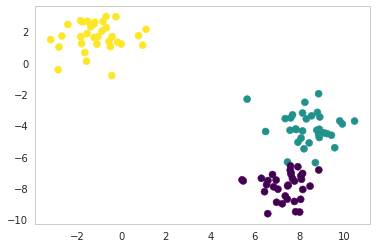

In [26]:
%matplotlib inline
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

blob_data, blob_labels = make_blobs(n_samples=100,
                                    random_state=2018)
test_pts = pd.DataFrame(blob_data, columns=['x', 'y'])
test_pts['group_id'] = blob_labels

plt.scatter(test_pts.x, test_pts.y, c=test_pts.group_id, cmap='viridis')
test_pts.sample(5)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


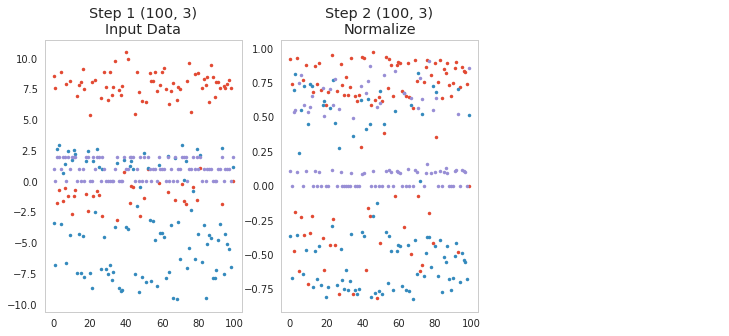

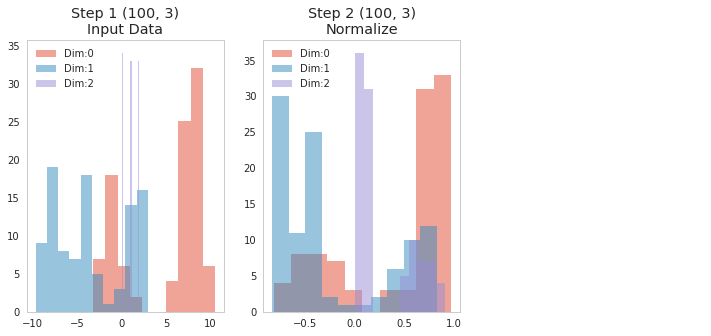

In [27]:
from pipe_utils import show_pipe
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
simple_pipe = Pipeline([('Normalize', Normalizer())])
simple_pipe.fit(test_pts)

show_pipe(simple_pipe, test_pts.values)
show_pipe(simple_pipe, test_pts.values, show_hist = True)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


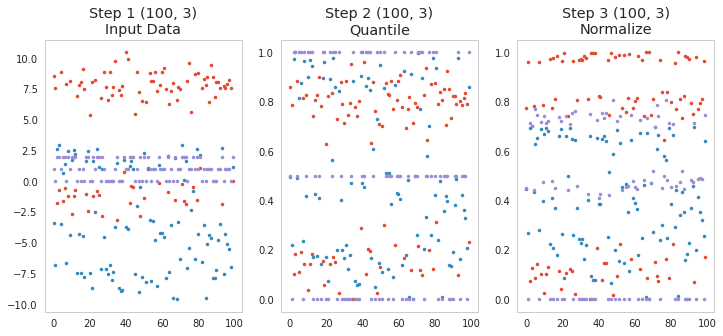

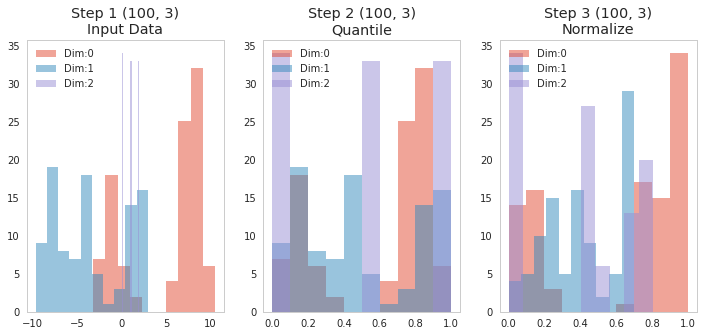

In [28]:
from sklearn.preprocessing import QuantileTransformer
longer_pipe = Pipeline([ ('Quantile', QuantileTransformer(2)),
                        ('Normalize', Normalizer())
                      ])
longer_pipe.fit(test_pts)

show_pipe(longer_pipe, test_pts.values)
show_pipe(longer_pipe, test_pts.values, show_hist = True)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


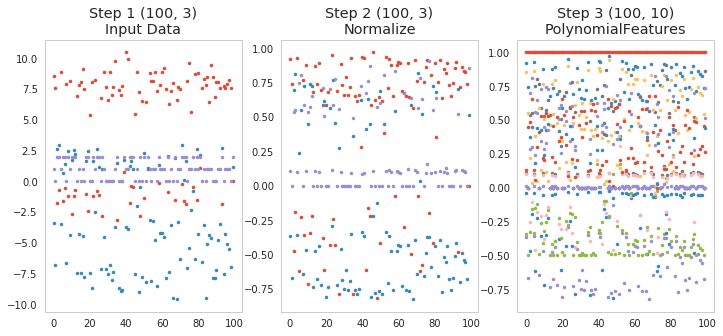

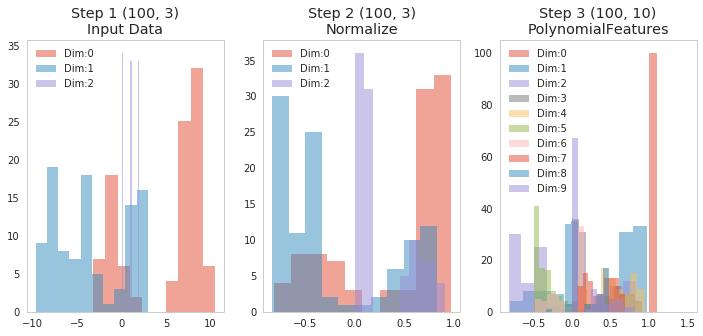

In [29]:
from sklearn.preprocessing import PolynomialFeatures
messy_pipe = Pipeline([
    ('Normalize', Normalizer()),
    ('PolynomialFeatures', PolynomialFeatures(2)),
                      ])
messy_pipe.fit(test_pts)

show_pipe(messy_pipe, test_pts.values)
show_pipe(messy_pipe, test_pts.values, show_hist = True)

# Classification

A common problem of putting images into categories. The standard problem for this is classifying digits between 0 and 9. Fundamentally a classification problem is one where we are taking a large input (images, vectors, ...) and trying to put it into a category. 



In [30]:
%matplotlib inline
from pipe_utils import show_pipe
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digit_ds = load_digits(return_X_y=False)
img_data = digit_ds.images[:50]
digit_id = digit_ds.target[:50]
print('Image Data', img_data.shape)

Image Data (50, 8, 8)


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


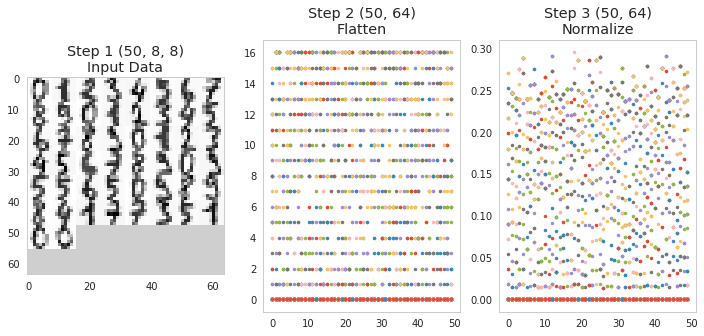

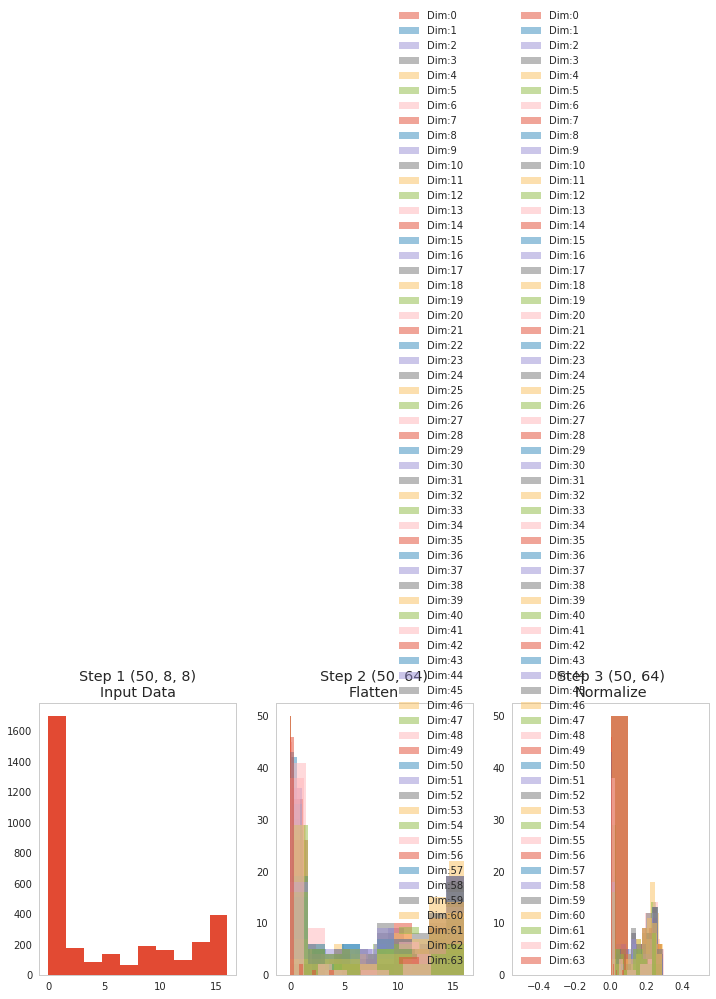

In [31]:
from pipe_utils import flatten_step
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
digit_pipe = Pipeline([('Flatten', flatten_step),
                        ('Normalize', Normalizer())])
digit_pipe.fit(img_data)

show_pipe(digit_pipe, img_data)
show_pipe(digit_pipe, img_data, show_hist = True)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


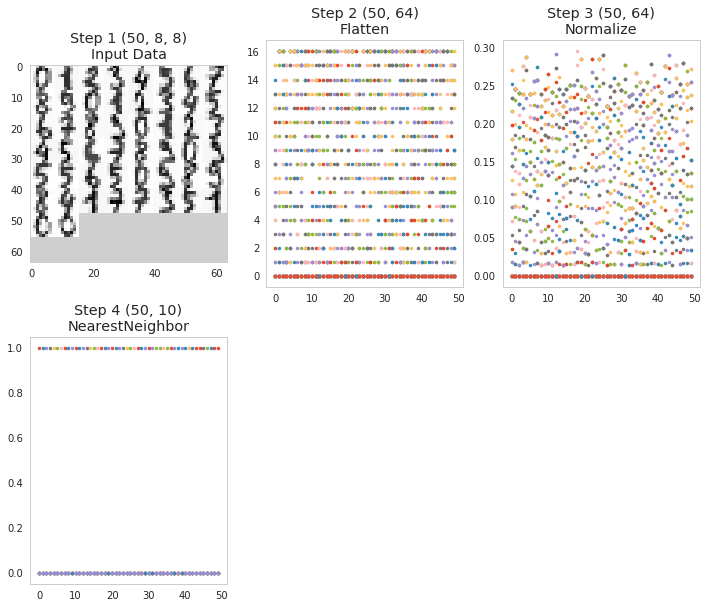

In [32]:
from sklearn.neighbors import KNeighborsClassifier

digit_class_pipe = Pipeline([('Flatten', flatten_step),
                        ('Normalize', Normalizer()),
                      ('NearestNeighbor', KNeighborsClassifier(1))])
digit_class_pipe.fit(img_data, digit_id)

show_pipe(digit_class_pipe, img_data)

In [33]:
from sklearn.metrics import accuracy_score
pred_digit = digit_class_pipe.predict(img_data)
print('%2.2f%% accuracy' % (100*accuracy_score(digit_id, pred_digit)))

100.00% accuracy


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


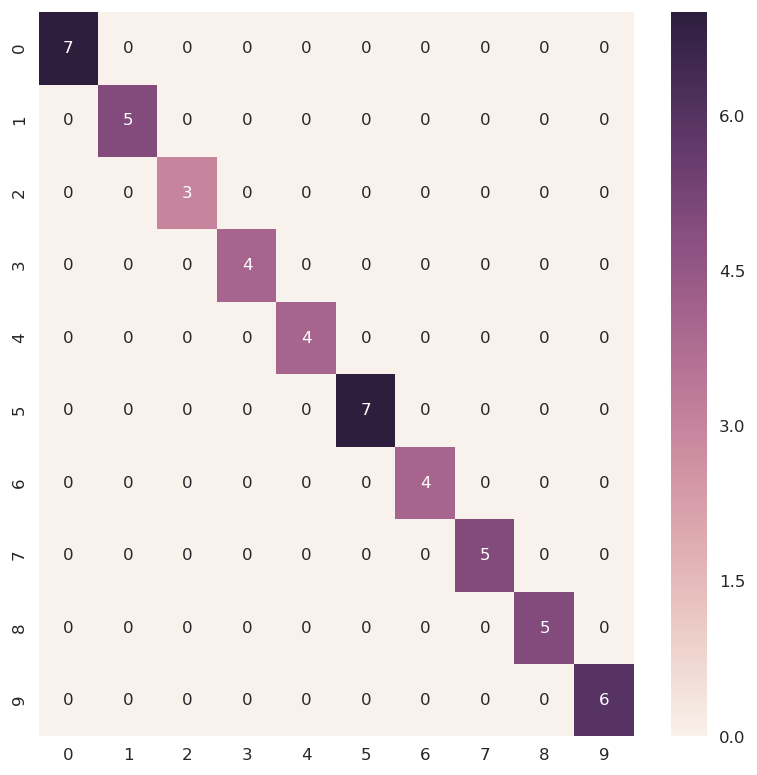

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
fig, ax1 = plt.subplots(1, 1, figsize=(8, 8), dpi=120)
sns.heatmap(
    confusion_matrix(digit_id, pred_digit),
    annot=True,
    fmt='d',
    ax=ax1);

In [35]:
from sklearn.metrics import classification_report
print(classification_report(digit_id, pred_digit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Wow! We've built an amazing algorithm!
## Let's patent it! Call Google!

Prediction: [8]
Real Value: 9


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


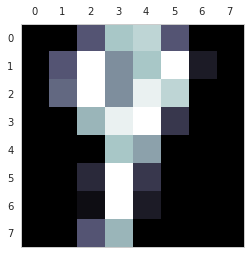

In [36]:
test_digit = np.array([[[ 0.,  0.,  6., 12., 13.,  6.,  0.,  0.],
        [ 0.,  6., 16.,  9., 12., 16.,  2.,  0.],
        [ 0.,  7., 16.,  9., 15., 13.,  0.,  0.],
        [ 0.,  0., 11., 15., 16.,  4.,  0.,  0.],
        [ 0.,  0.,  0., 12., 10.,  0.,  0.,  0.],
        [ 0.,  0.,  3., 16.,  4.,  0.,  0.,  0.],
        [ 0.,  0.,  1., 16.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  6., 11.,  0.,  0.,  0.,  0.]]])
plt.matshow(test_digit[0], cmap = 'bone')
print('Prediction:', digit_class_pipe.predict(test_digit))
print('Real Value:', 9)

# Training, Validation, and Testing

https://www.kdnuggets.com/2017/08/dataiku-predictive-model-holdout-cross-validation.html

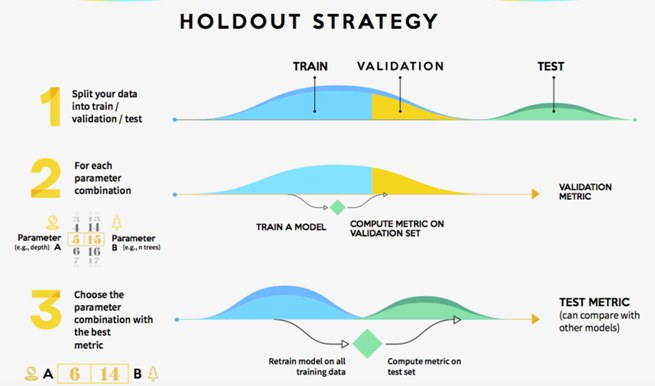


# Regression
For regression, we can see it very similarly to a classification but instead of trying to output discrete classes we can output on a continuous scale. So we can take the exact same task (digits) but instead of predicting the category we can predict the actual decimal number

In [37]:
%matplotlib inline
from pipe_utils import show_pipe, flatten_step
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digit_ds = load_digits(return_X_y=False)

img_data = digit_ds.images[:50]
digit_id = digit_ds.target[:50]

valid_data = digit_ds.images[50:500]
valid_id = digit_ds.target[50:500]

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


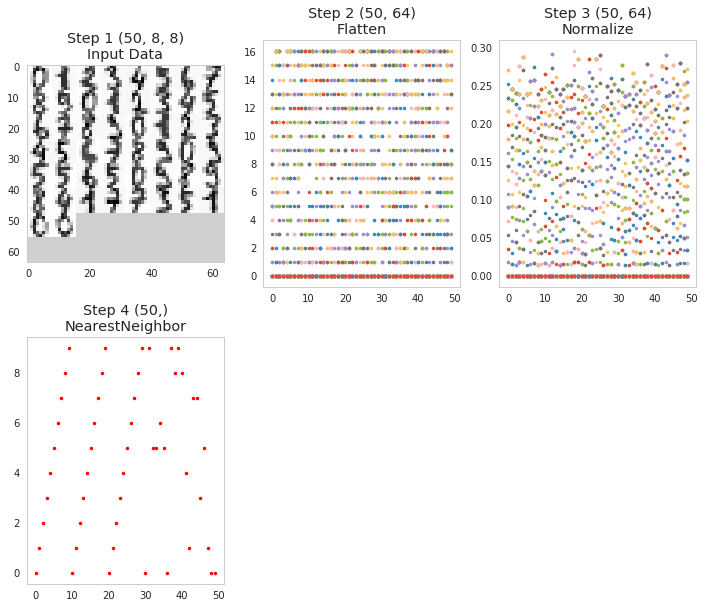

In [38]:
from sklearn.neighbors import KNeighborsRegressor

digit_regress_pipe = Pipeline([('Flatten', flatten_step),
                        ('Normalize', Normalizer()),
                      ('NearestNeighbor', KNeighborsRegressor(1))])
digit_regress_pipe.fit(img_data, digit_id)

show_pipe(digit_regress_pipe, img_data)

# Assessment
We can't use accuracy, ROC, precision, recall or any of these factors anymore since we don't have binary / true-or-false conditions we are trying to predict. We know have to go back to some of the initial metrics we covered in the first lectures.

$$ MSE = \frac{1}{N}\sum \left(y_{predicted} - y_{actual}\right)^2 $$
$$ MAE = \frac{1}{N}\sum |y_{predicted} - y_{actual}| $$

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


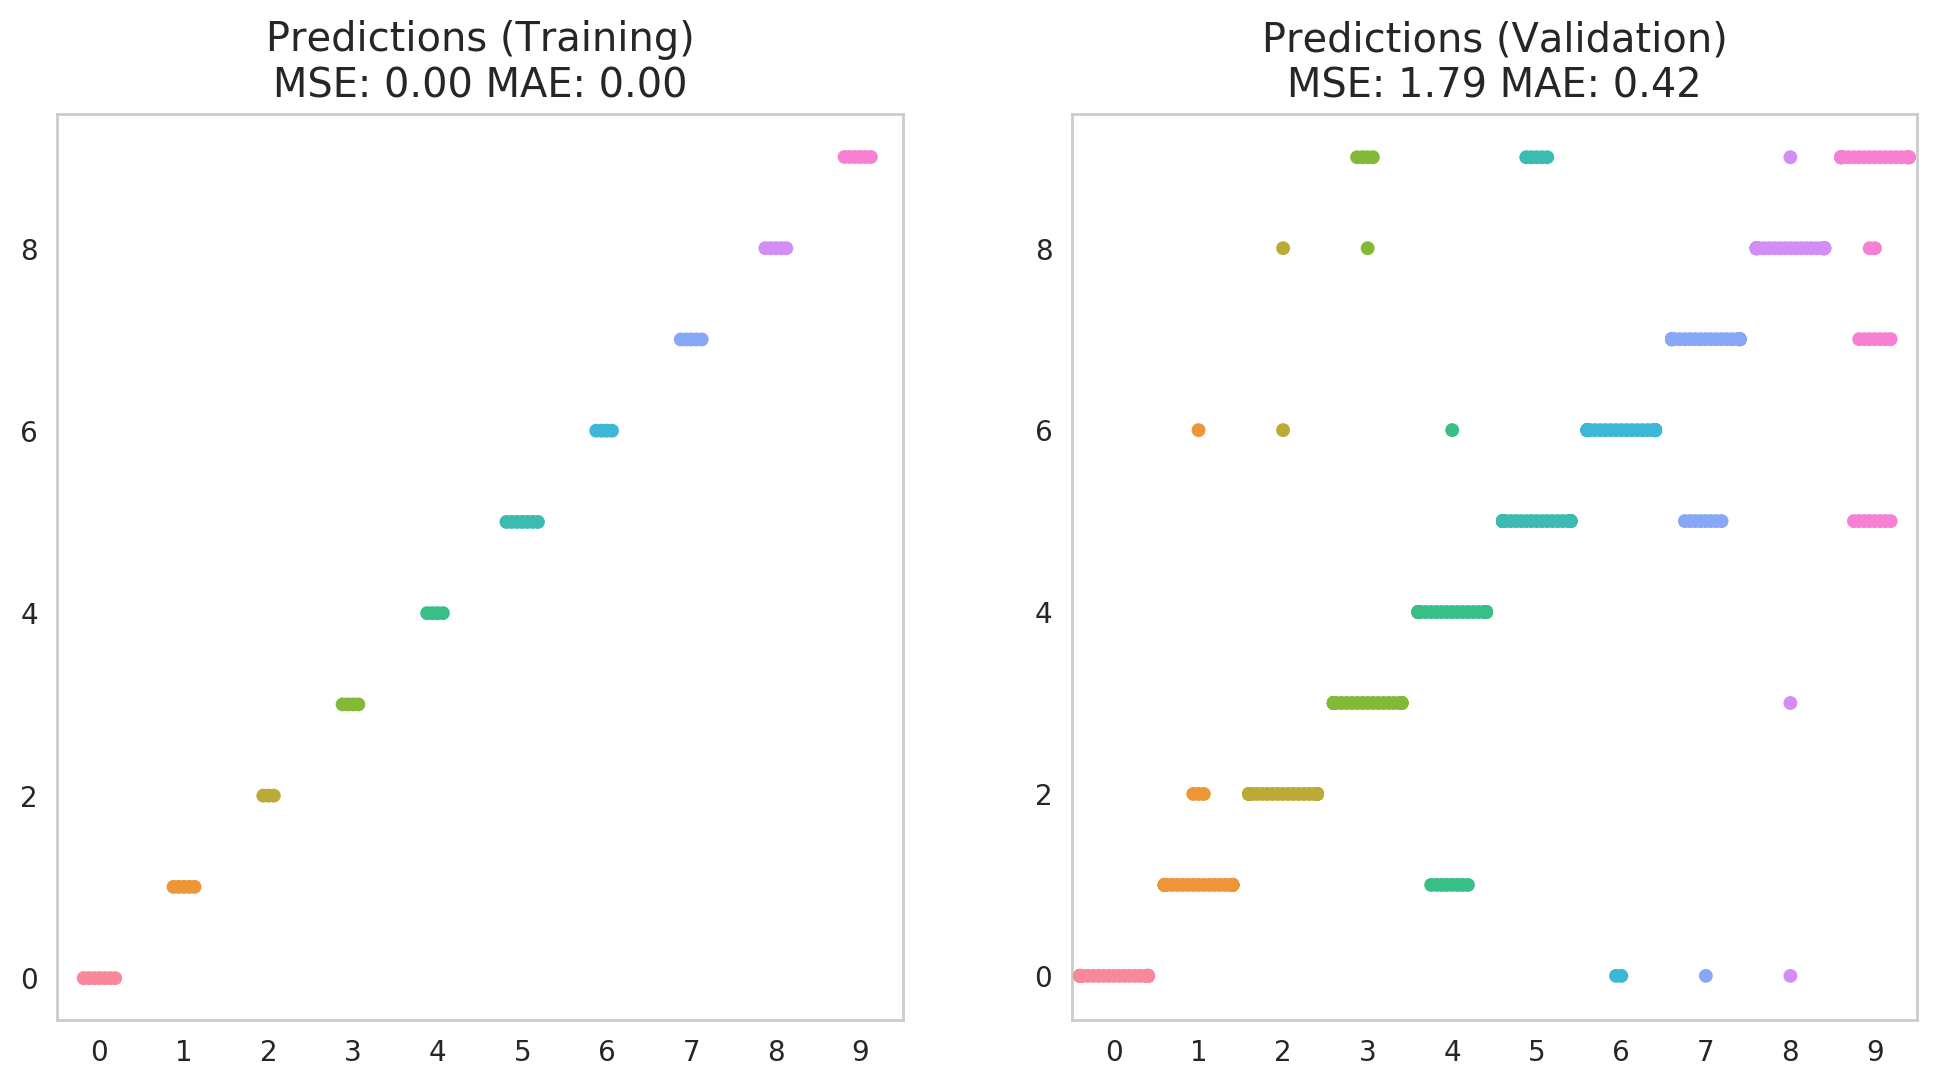

In [39]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6), dpi = 200)
pred_train = digit_regress_pipe.predict(img_data)

sns.swarmplot(digit_id, pred_train, ax = ax1)
ax1.set_title('Predictions (Training)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_train-digit_id)), 
                                                                np.mean(np.abs(pred_train-digit_id))))

pred_valid = digit_regress_pipe.predict(valid_data)
sns.swarmplot(valid_id, pred_valid, ax = ax2)
ax2.set_title('Predictions (Validation)\nMSE: %2.2f MAE: %2.2f' % (np.mean(np.square(pred_valid-valid_id)), 
                                                                np.mean(np.abs(pred_valid-valid_id))));

# Segmentation (Pixel Classification)

The first tasks we had were from one entire image to a single class (classification) or value (regression). Now we want to change problem, instead of a single class for each image, we want a class or value for each pixel. This requires that we restructure the problem.

# Where segmentation fails: Brain Cortex

![Cortex Image](ext-figures/cortex_mask.png)

- The cortex is barely visible to the human eye
- Tiny structures hint at where cortex is located

*** 

- A simple threshold is insufficient to finding the cortical structures
- Other filtering techniques are unlikely to magicially fix this problem


(173, 135) (173, 135)


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


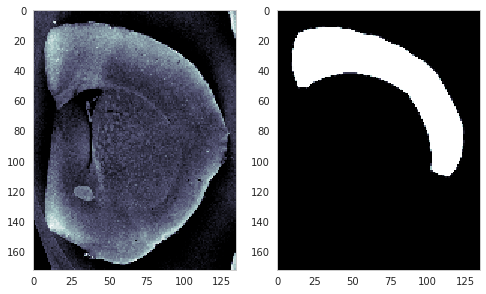

In [40]:
%matplotlib inline
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cortex_img = imread("ext-figures/example_poster.tif")[::6, ::6]/2048
cortex_mask = imread("ext-figures/example_poster_mask.tif")[::3, ::3, 0]/255.0
print(cortex_img.shape, cortex_mask.shape)
np.random.seed(2018)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 8), dpi = 72)
ax1.imshow(cortex_img, cmap = 'bone')
ax2.imshow(cortex_mask, cmap = 'bone')

In [41]:
train_img, valid_img = cortex_img[:,:100], cortex_img[:,100:]
train_mask, valid_mask = cortex_mask[:,:100], cortex_mask[:,100:]
print('Training', train_img.shape, train_mask.shape)
print('Validation Data', valid_img.shape, valid_mask.shape)

Training (173, 100) (173, 100)
Validation Data (173, 35) (173, 35)


Text(0.5,1,'Validation Mask')

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


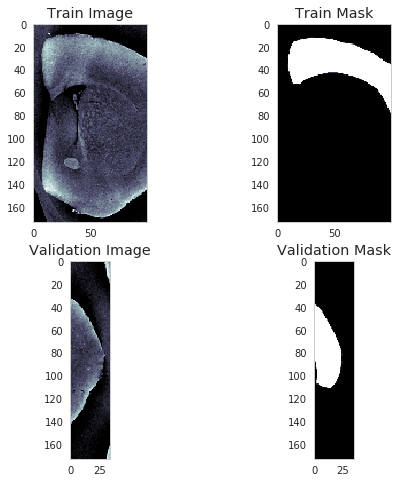

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8), dpi = 72)
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(valid_img, cmap = 'bone')
ax3.set_title('Validation Image')
ax4.imshow(valid_mask, cmap = 'bone')
ax4.set_title('Validation Mask')

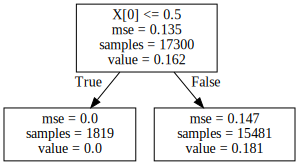

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


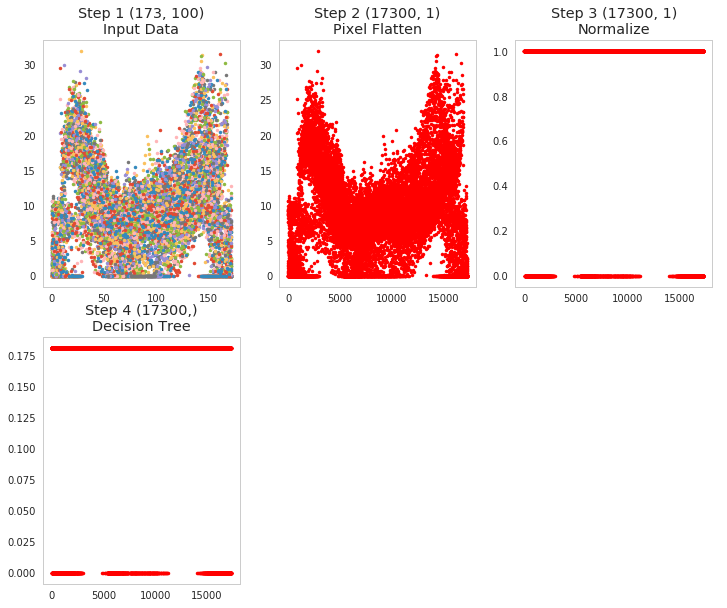

In [43]:
from pipe_utils import px_flatten_step, show_pipe, fit_img_pipe
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf_seg_model = Pipeline([('Pixel Flatten', px_flatten_step),
                        ('Normalize', Normalizer()),
                       ('Decision Tree', DecisionTreeRegressor())
                      ])
    
pred_func = fit_img_pipe(rf_seg_model, train_img, train_mask)
show_pipe(rf_seg_model, train_img)
show_tree(rf_seg_model.steps[-1][1])

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


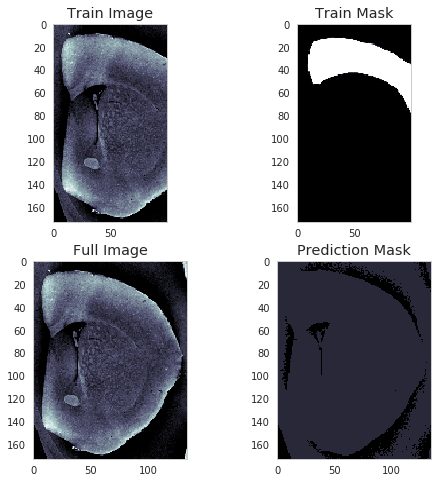

In [44]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8), dpi = 72)
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')

ax4.imshow(pred_func(cortex_img)[:,:,0], 
           cmap = 'bone', vmin = 0, vmax = 1)
ax4.set_title('Prediction Mask');

# Include Position Information

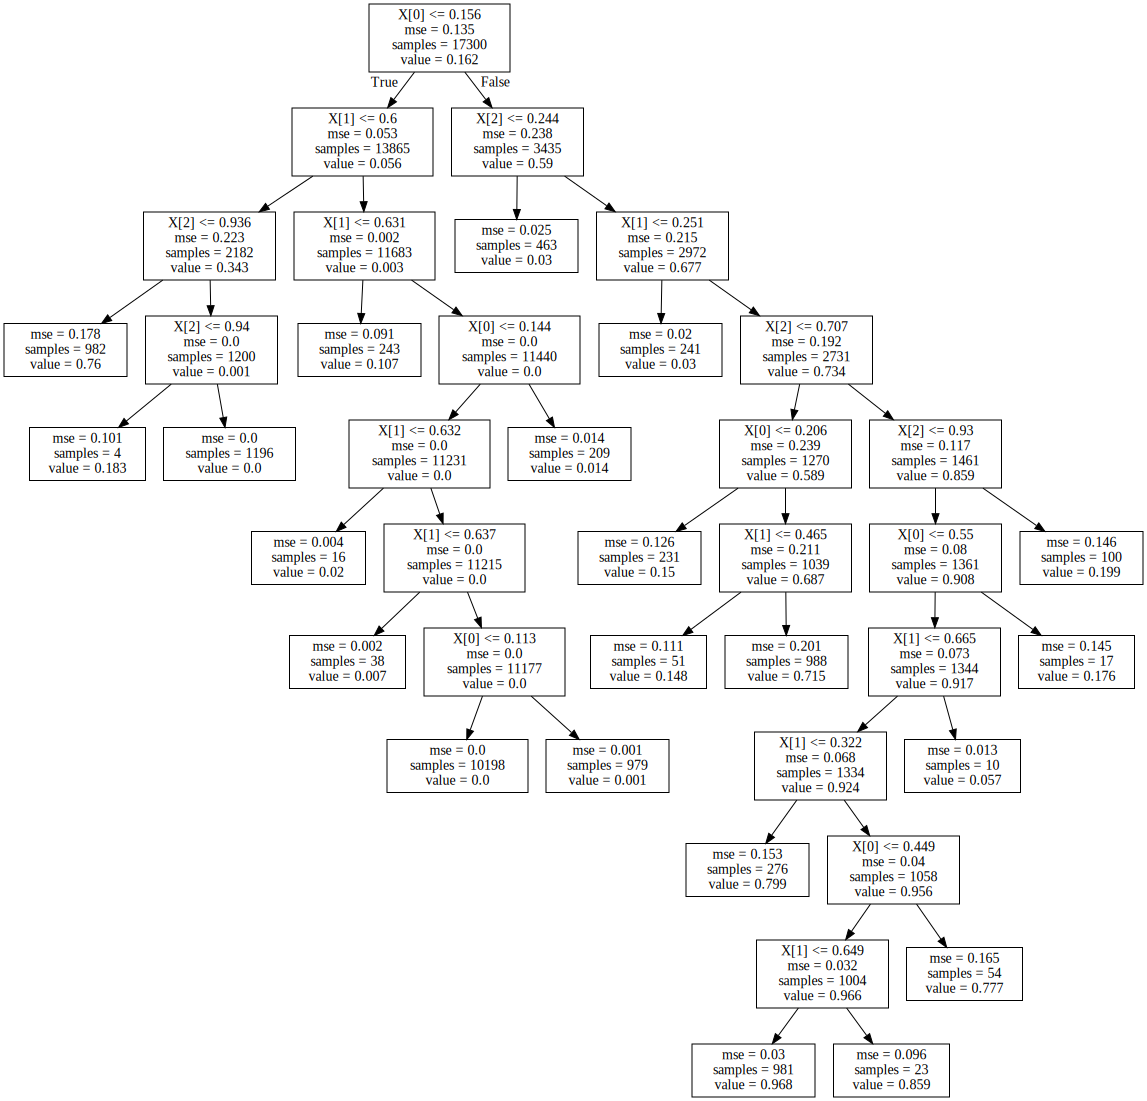

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


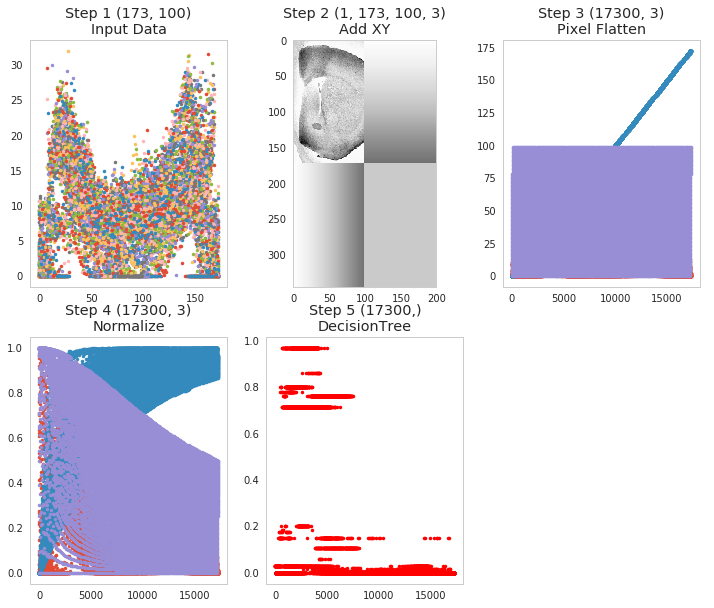

In [45]:
from pipe_utils import xy_step

rf_xyseg_model = Pipeline([('Add XY', xy_step),
                         ('Pixel Flatten', px_flatten_step),
                        ('Normalize', Normalizer()),
                       ('DecisionTree', DecisionTreeRegressor(min_samples_split = 1000))
                      ])

pred_func = fit_img_pipe(rf_xyseg_model, train_img, train_mask)
show_pipe(rf_xyseg_model, train_img)
show_tree(rf_xyseg_model.steps[-1][1])

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


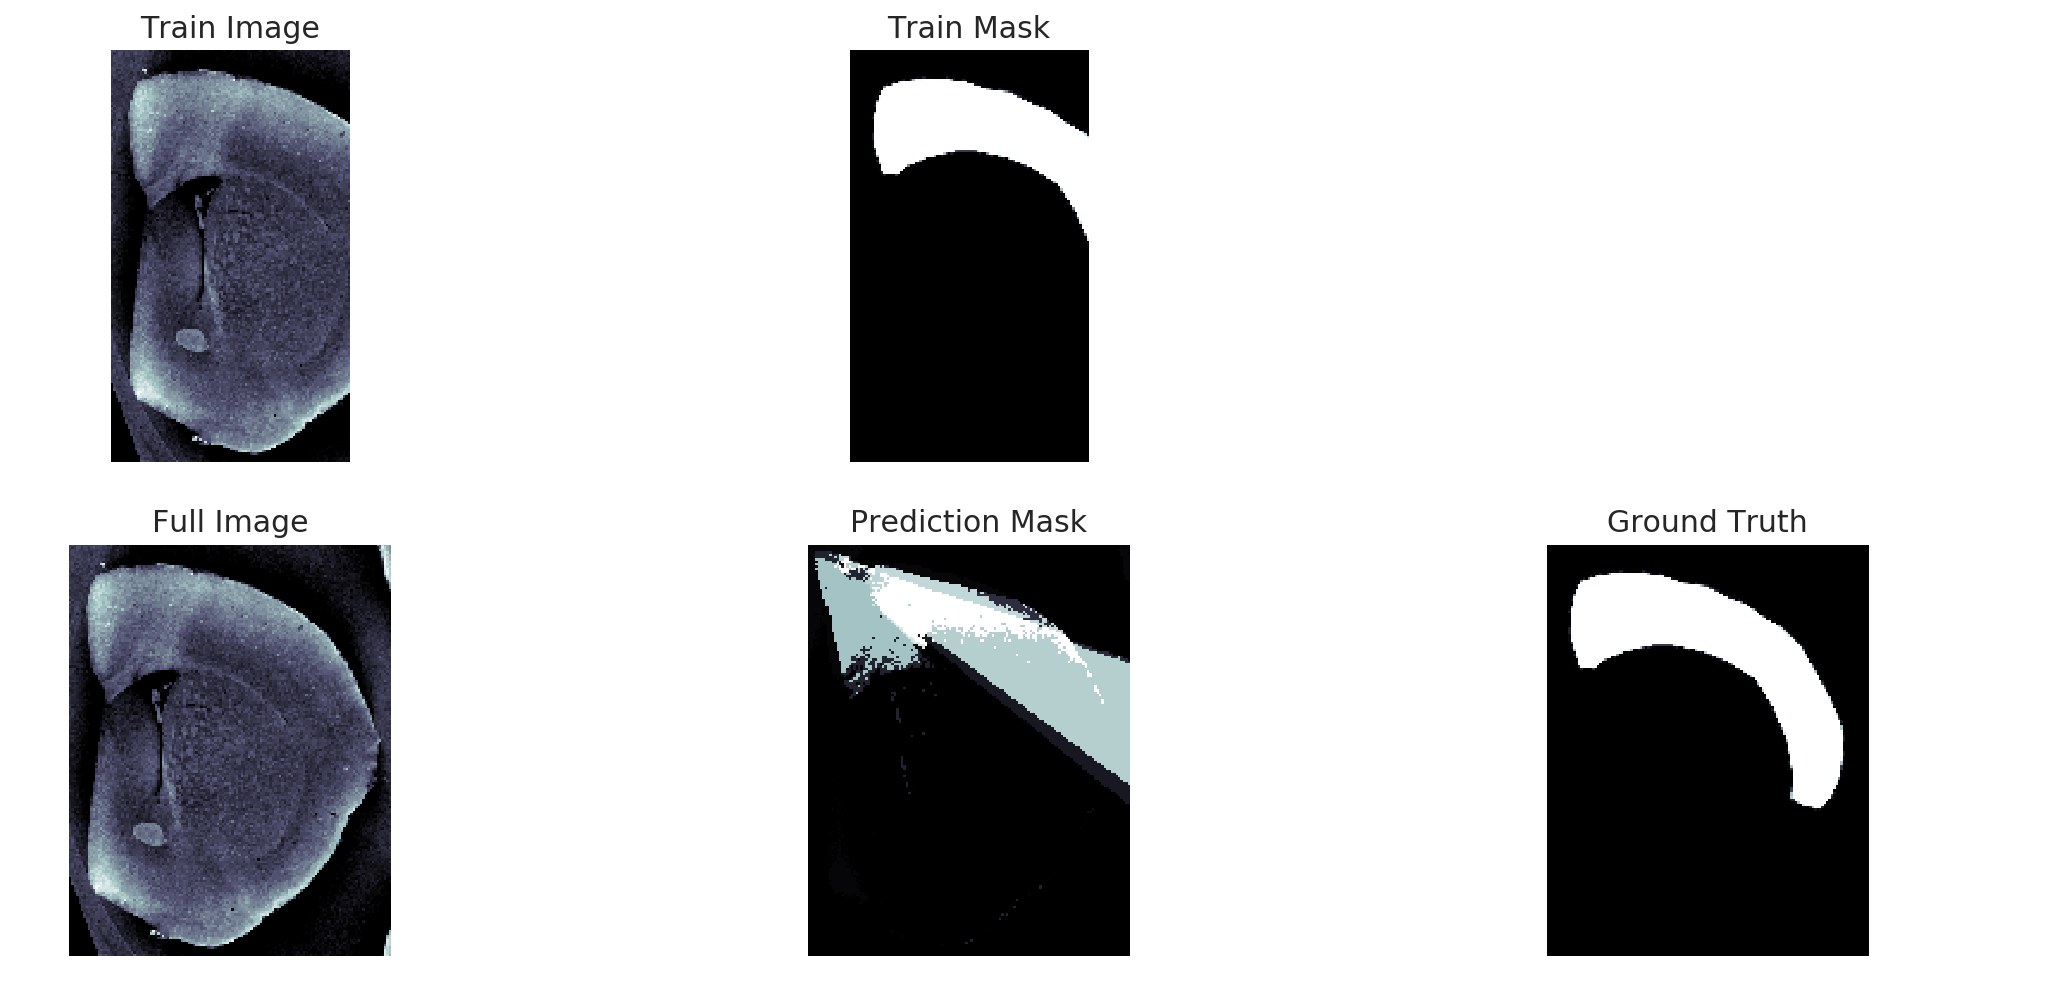

In [46]:
fig, m_axs = plt.subplots(2, 3, figsize = (18, 8), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')

ax4.imshow(pred_func(cortex_img)[:,:,0], 
           cmap = 'bone')
ax4.set_title('Prediction Mask');

ax5.imshow(cortex_mask, 
           cmap = 'bone')
ax5.set_title('Ground Truth');

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


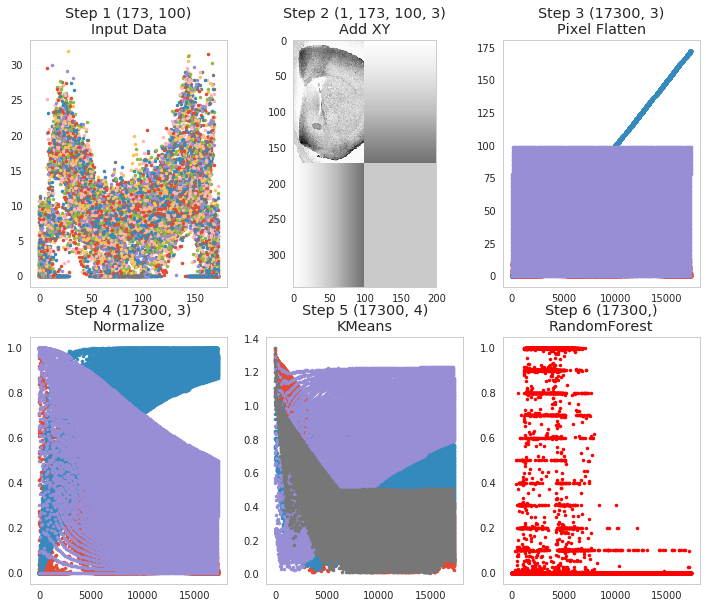

In [47]:
from sklearn.cluster import KMeans
rf_xyseg_k_model = Pipeline([('Add XY', xy_step),
                         ('Pixel Flatten', px_flatten_step),
                        ('Normalize', Normalizer()),
                        ('KMeans', KMeans(4)),
                       ('RandomForest', RandomForestRegressor())
                      ])

pred_func = fit_img_pipe(rf_xyseg_k_model, train_img, train_mask)
show_pipe(rf_xyseg_k_model, train_img);

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


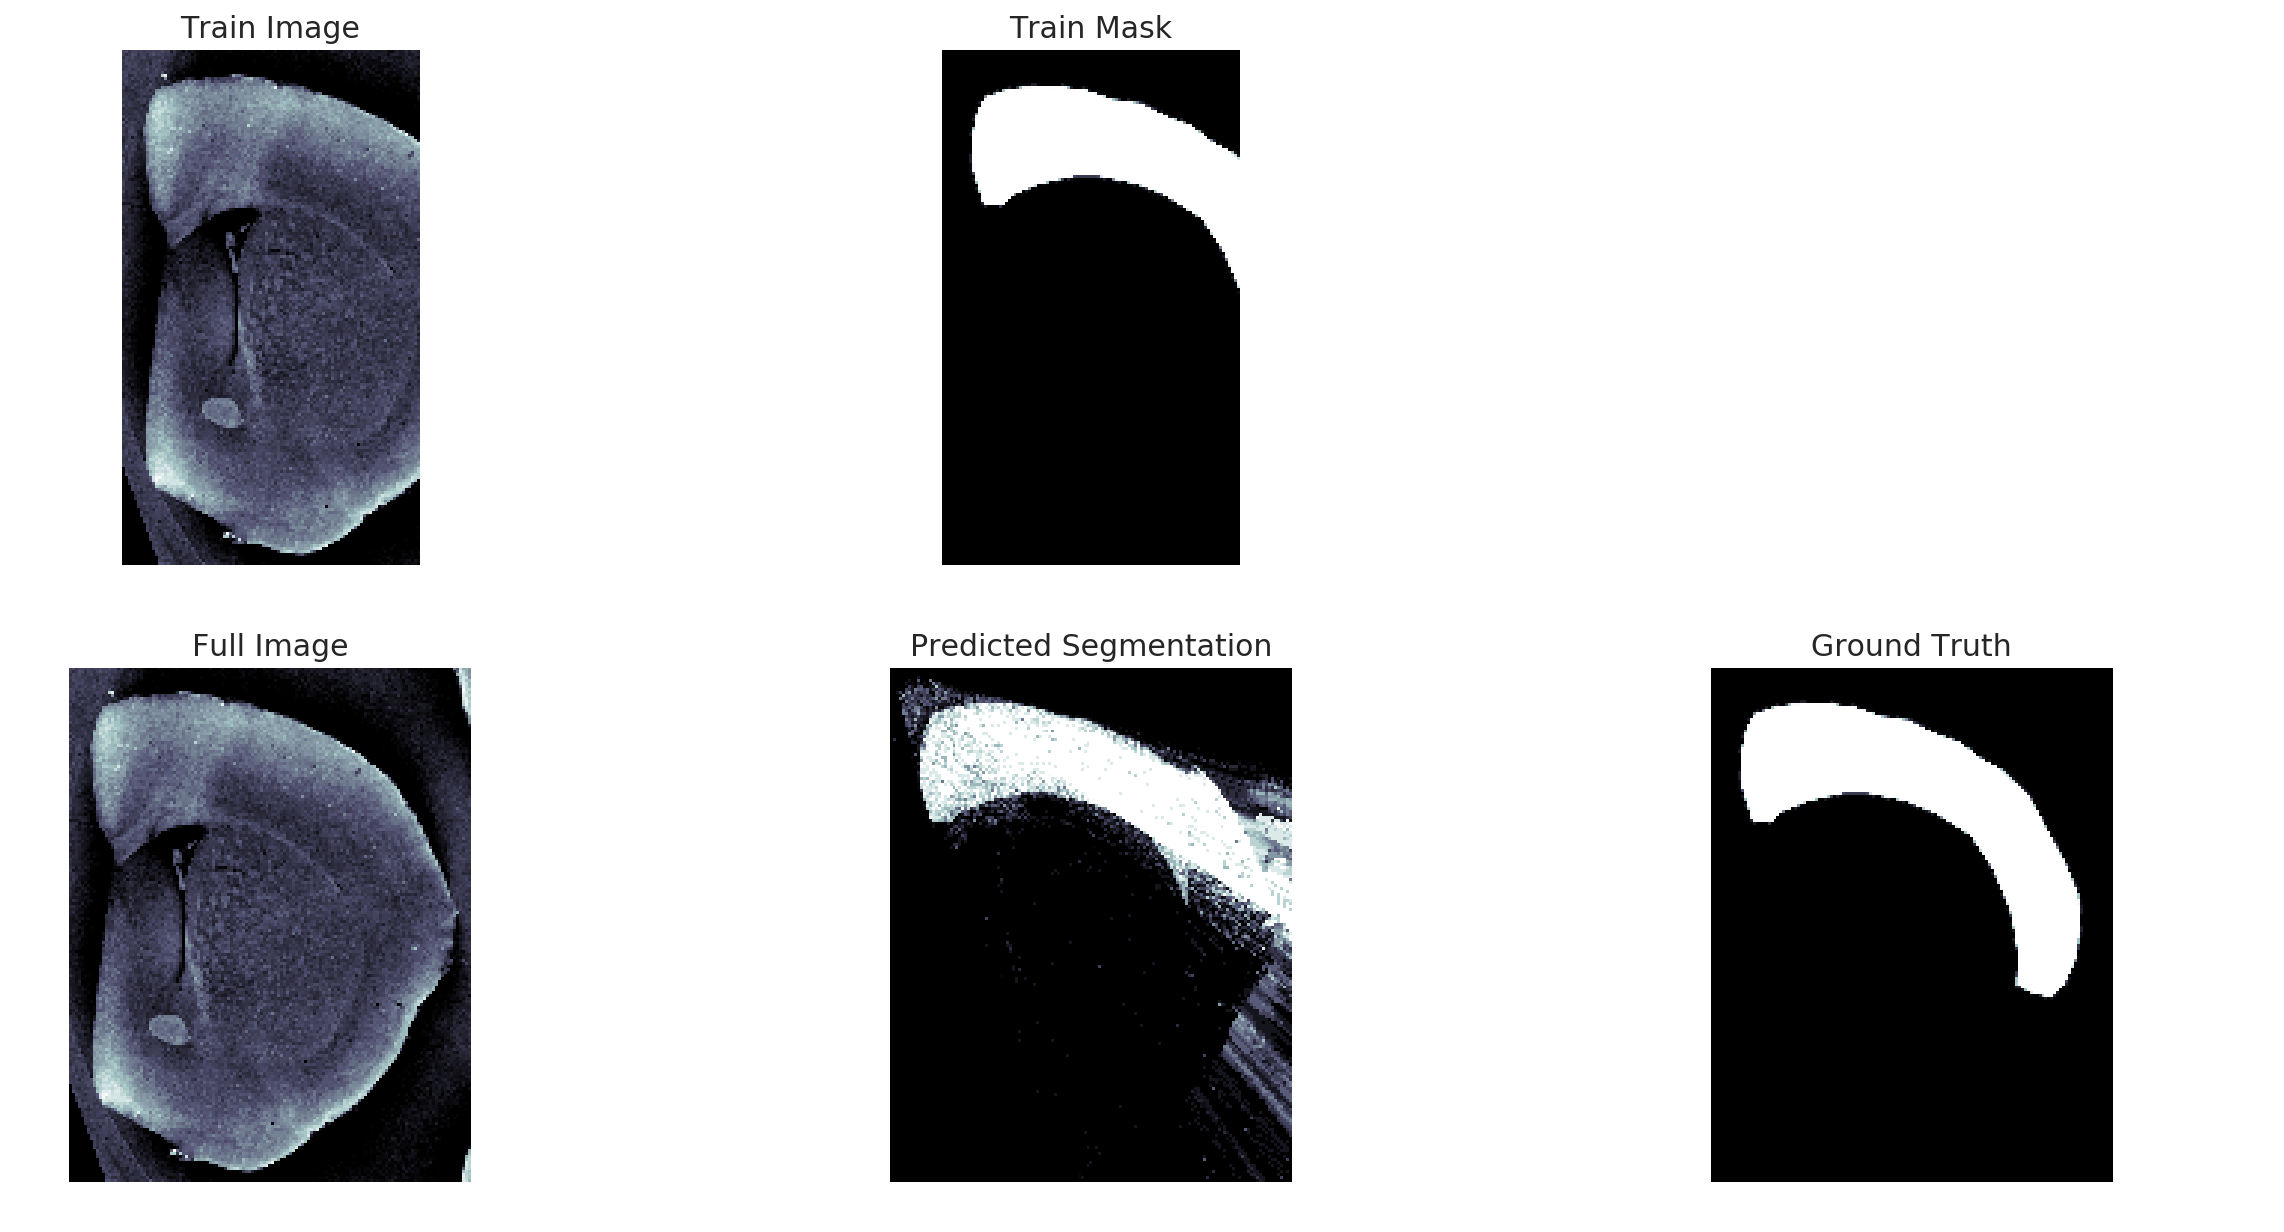

In [48]:
fig, m_axs = plt.subplots(2, 3, figsize = (20, 10), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')

ax4.imshow(pred_func(cortex_img)[:,:,0], 
           cmap = 'bone')
ax4.set_title('Predicted Segmentation');

ax5.imshow(cortex_mask, 
           cmap = 'bone')
ax5.set_title('Ground Truth');

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


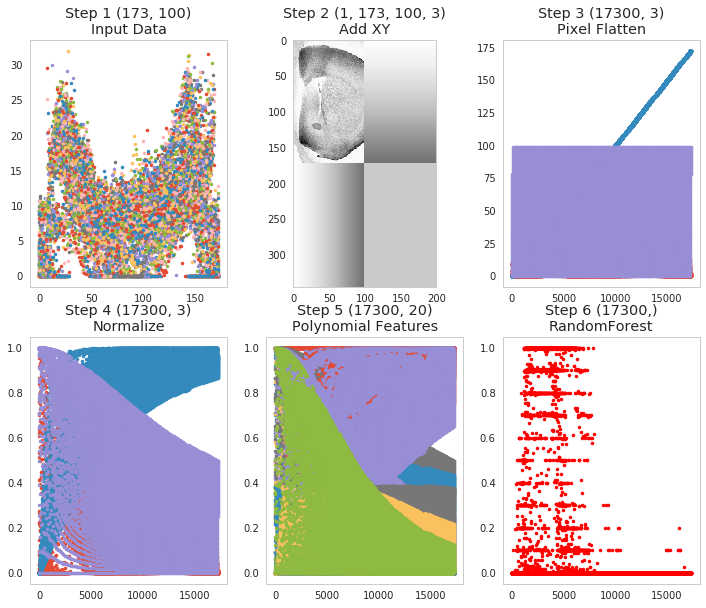

In [49]:
from sklearn.preprocessing import PolynomialFeatures
rf_xyseg_py_model = Pipeline([('Add XY', xy_step),
                         ('Pixel Flatten', px_flatten_step),
                        ('Normalize', Normalizer()),
                        ('Polynomial Features', PolynomialFeatures(3)),
                       ('RandomForest', RandomForestRegressor())
                      ])

pred_func = fit_img_pipe(rf_xyseg_py_model, train_img, train_mask)
show_pipe(rf_xyseg_py_model, train_img);

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


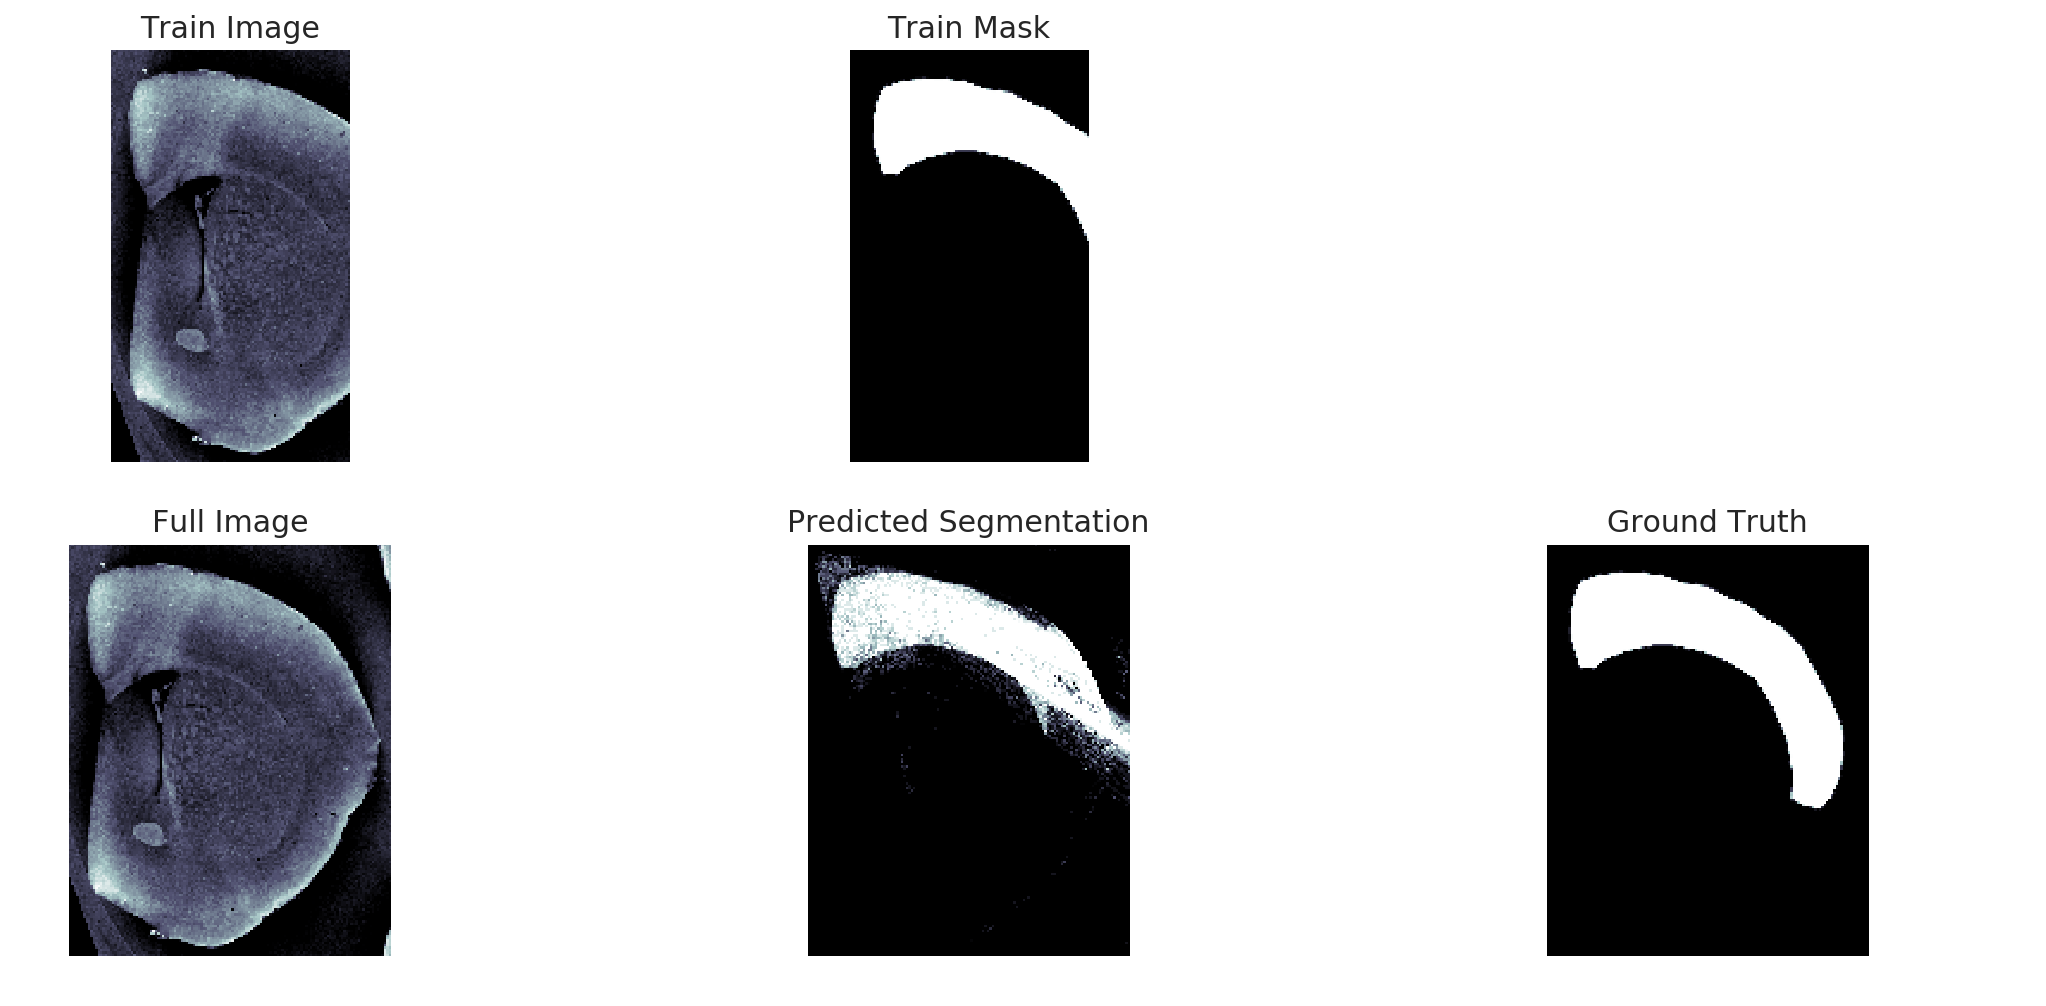

In [50]:
fig, m_axs = plt.subplots(2, 3, figsize = (18, 8), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')

ax4.imshow(pred_func(cortex_img)[:,:,0], 
           cmap = 'bone')
ax4.set_title('Predicted Segmentation');

ax5.imshow(cortex_mask, 
           cmap = 'bone')
ax5.set_title('Ground Truth');

# Adding Smarter Features
Here we add polar coordinates ($r$, and $\theta$) instead of x any y. This provides a better way for looking at images like this oval-like brain.

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


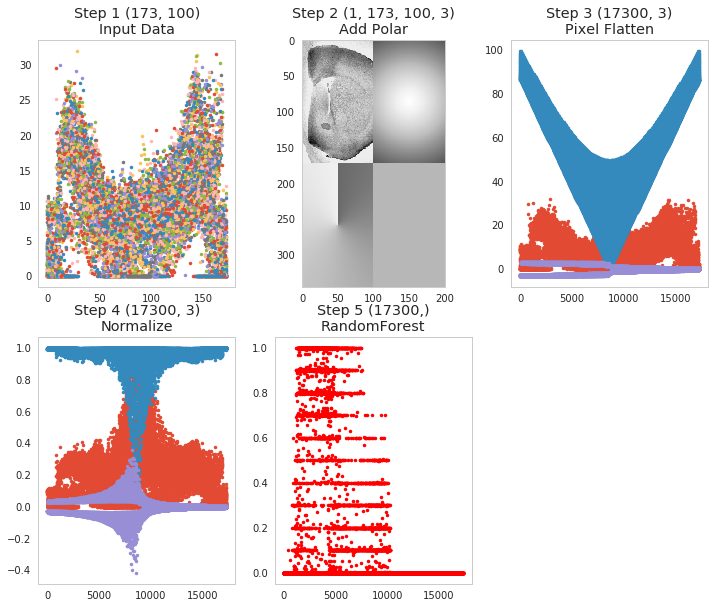

In [51]:
from pipe_utils import polar_step
rf_polarseg_model = Pipeline([('Add Polar', polar_step),
                         ('Pixel Flatten', px_flatten_step),
                        ('Normalize', Normalizer()),
                       ('RandomForest', RandomForestRegressor())
                      ])

pred_func = fit_img_pipe(rf_polarseg_model, train_img, train_mask)
show_pipe(rf_polarseg_model, train_img);

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


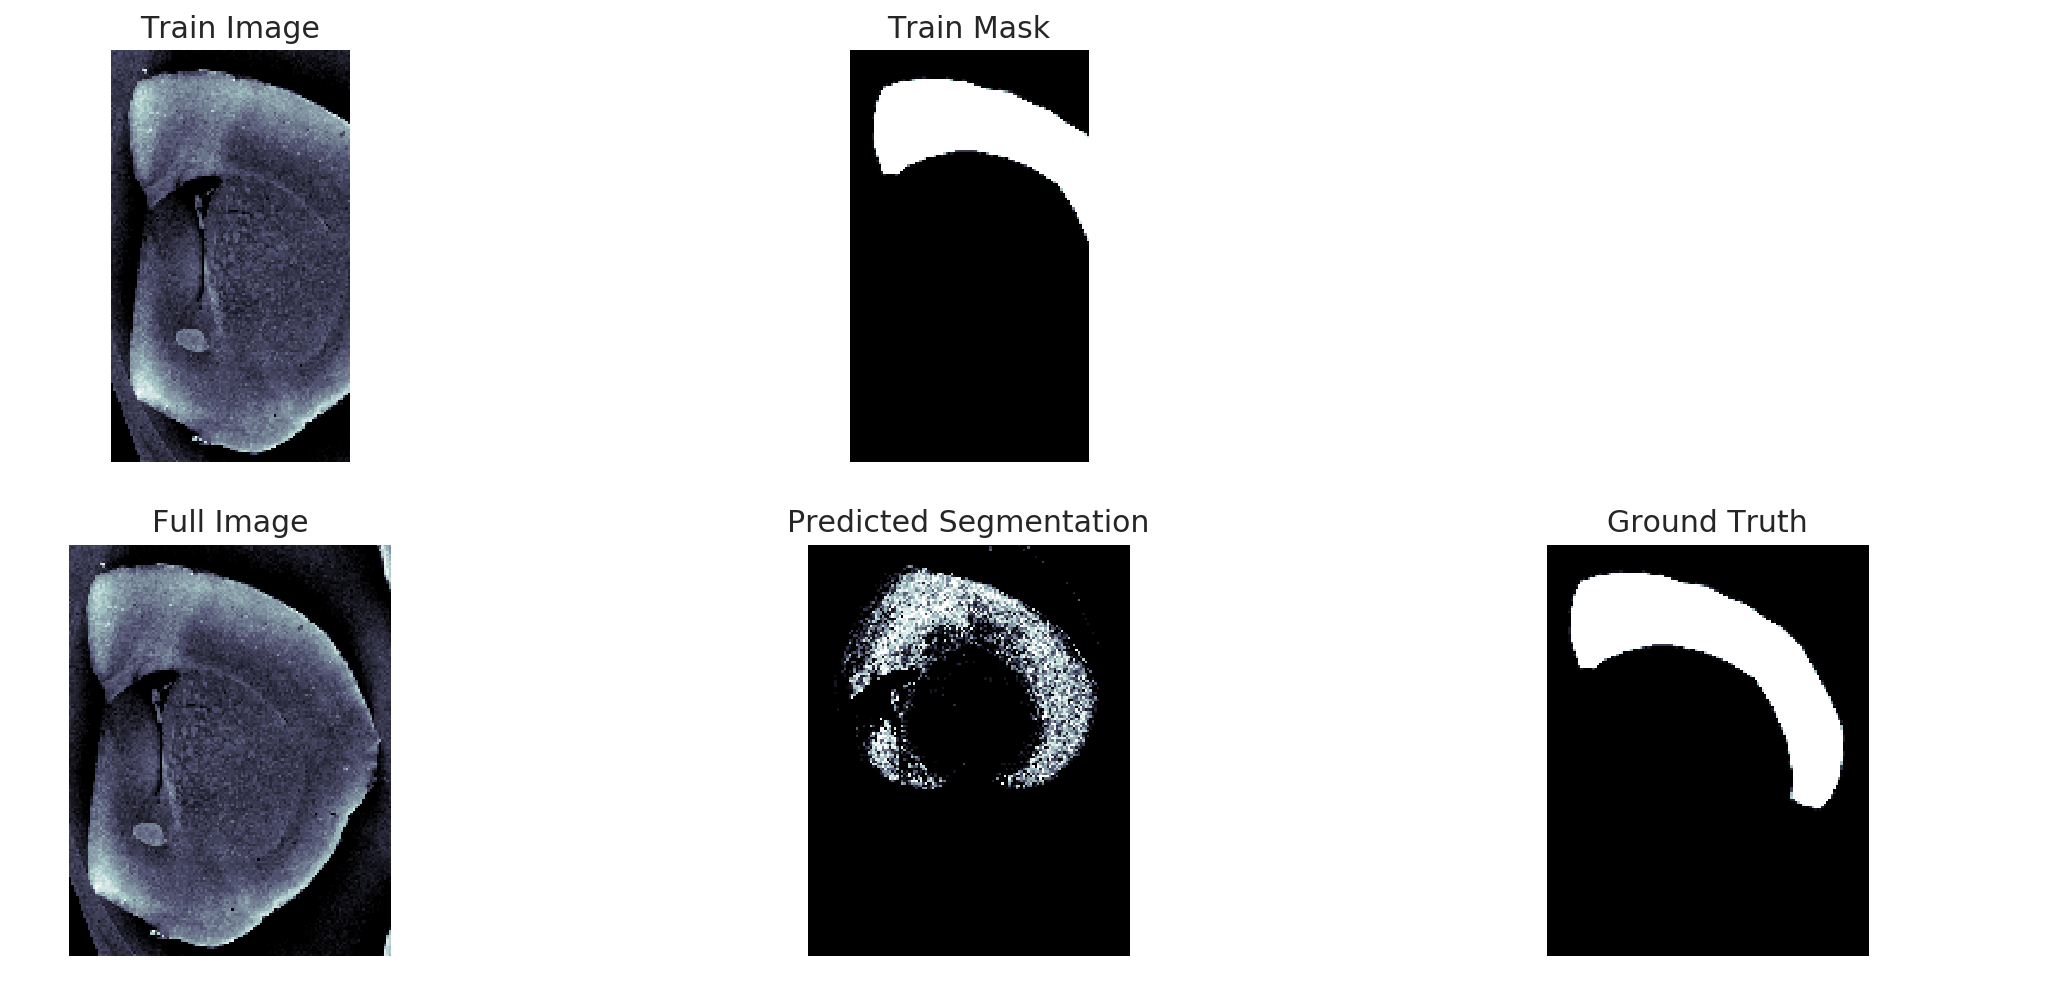

In [52]:
fig, m_axs = plt.subplots(2, 3, figsize = (18, 8), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')

ax4.imshow(pred_func(cortex_img)[:,:,0], 
           cmap = 'bone')
ax4.set_title('Predicted Segmentation');

ax5.imshow(cortex_mask, 
           cmap = 'bone')
ax5.set_title('Ground Truth');

# U-Net

The last approach we will briefly cover is the idea of [U-Net](https://arxiv.org/abs/1505.04597) a landmark paper from 2015 that dominates MICCAI submissions and contest winners today. A nice overview of the techniques is presented by [Vladimir Iglovikov](https://youtu.be/g6oIQ5MXBE4) a winner of a recent Kaggle competition on masking images of cars [slides](http://slides.com/vladimiriglovikov/kaggle-deep-learning-to-create-a-model-for-binary-segmentation-of-car-images)

![U-Net Diagram](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

Using TensorFlow backend.


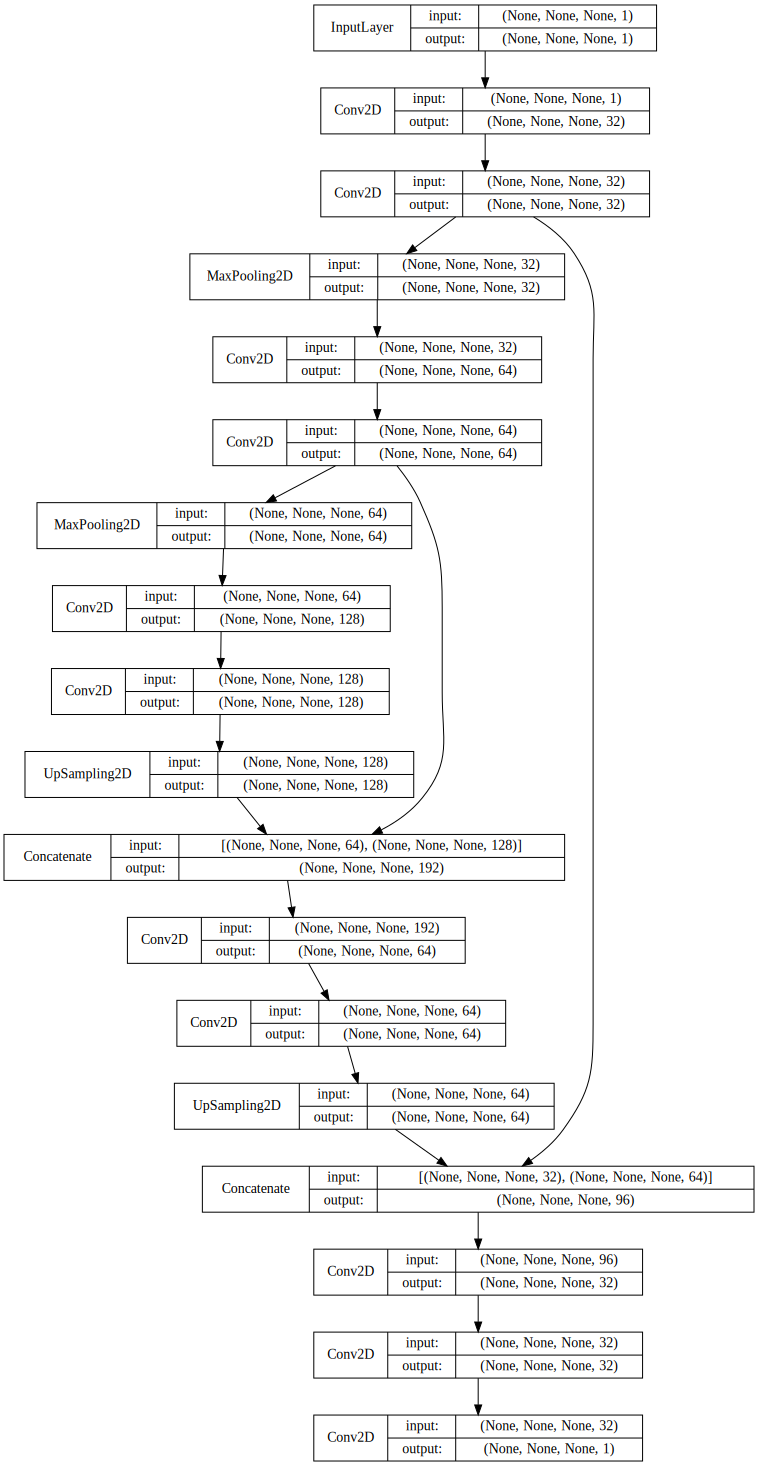

In [53]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D, concatenate
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
base_depth = 32
in_img = Input((None, None, 1), name = 'Image_Input')
lay_1 = Conv2D(base_depth, kernel_size = (3, 3), padding = 'same')(in_img)
lay_2 = Conv2D(base_depth, kernel_size = (3, 3), padding = 'same')(lay_1)
lay_3 = MaxPool2D((2,2))(lay_2)
lay_4 = Conv2D(base_depth*2, kernel_size = (3, 3), padding = 'same')(lay_3)
lay_5 = Conv2D(base_depth*2, kernel_size = (3, 3), padding = 'same')(lay_4)
lay_6 = MaxPool2D((2,2))(lay_5)
lay_7 = Conv2D(base_depth*4, kernel_size = (3, 3), padding = 'same')(lay_6)
lay_8 = Conv2D(base_depth*4, kernel_size = (3, 3), padding = 'same')(lay_7)
lay_9 = UpSampling2D((2,2))(lay_8)
lay_10 = concatenate([lay_5, lay_9])
lay_11 = Conv2D(base_depth*2, kernel_size = (3, 3), padding = 'same')(lay_10)
lay_12 = Conv2D(base_depth*2, kernel_size = (3, 3), padding = 'same')(lay_11)
lay_13 = UpSampling2D((2,2))(lay_12)
lay_14 = concatenate([lay_2, lay_13])
lay_15 = Conv2D(base_depth, kernel_size = (3, 3), padding = 'same')(lay_14)
lay_16 = Conv2D(base_depth, kernel_size = (3, 3), padding = 'same')(lay_15)
lay_17 = Conv2D(1, kernel_size = (1, 1), padding = 'same', activation = 'sigmoid')(lay_16)
t_unet = Model(inputs = [in_img], outputs = [lay_17], name = 'SmallUNET')
dot_mod = model_to_dot(t_unet, show_shapes = True, show_layer_names=False)
dot_mod.set_rankdir('UD')
SVG(dot_mod.create_svg())

In [54]:
t_unet.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Image_Input (InputLayer)        (None, None, None, 1 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 320         Image_Input[0][0]                
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, None, None, 3 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, None, None, 3 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

Training (200, 400) (200, 400)
Validation Data (300, 400) (300, 400)


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


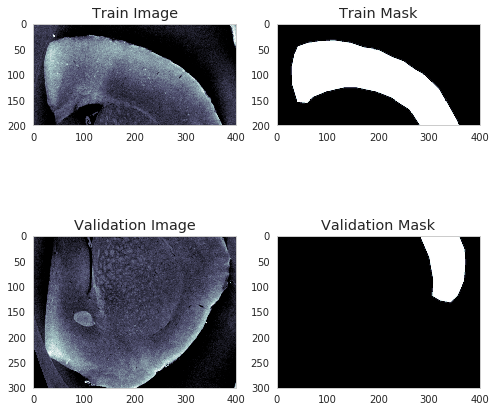

In [55]:
%matplotlib inline
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
cortex_img = imread("ext-figures/example_poster.tif")[::2, ::2]/2048
cortex_mask = imread("ext-figures/example_poster_mask.tif")[0::1, ::1, 0]/255.0
cortex_img = cortex_img[:500, :-3]
cortex_mask = cortex_mask[:500, :-3]
train_img, valid_img = cortex_img[:200,:], cortex_img[200:]
train_mask, valid_mask = cortex_mask[:200,], cortex_mask[200:]
# add channels and sample dimensions
prep_img = lambda x: (np.expand_dims(np.expand_dims(x,0),-1)-train_img.mean())/train_img.std()
prep_mask = lambda x: np.expand_dims(np.expand_dims(x,0),-1) 
print('Training', train_img.shape, train_mask.shape)
print('Validation Data', valid_img.shape, valid_mask.shape)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8), dpi = 72)
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(valid_img, cmap = 'bone')
ax3.set_title('Validation Image')
ax4.imshow(valid_mask, cmap = 'bone')
ax4.set_title('Validation Mask');

# Results from Untrained Model
We can make predictions with an untrained model, but we clearly do not expect them to be very good

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


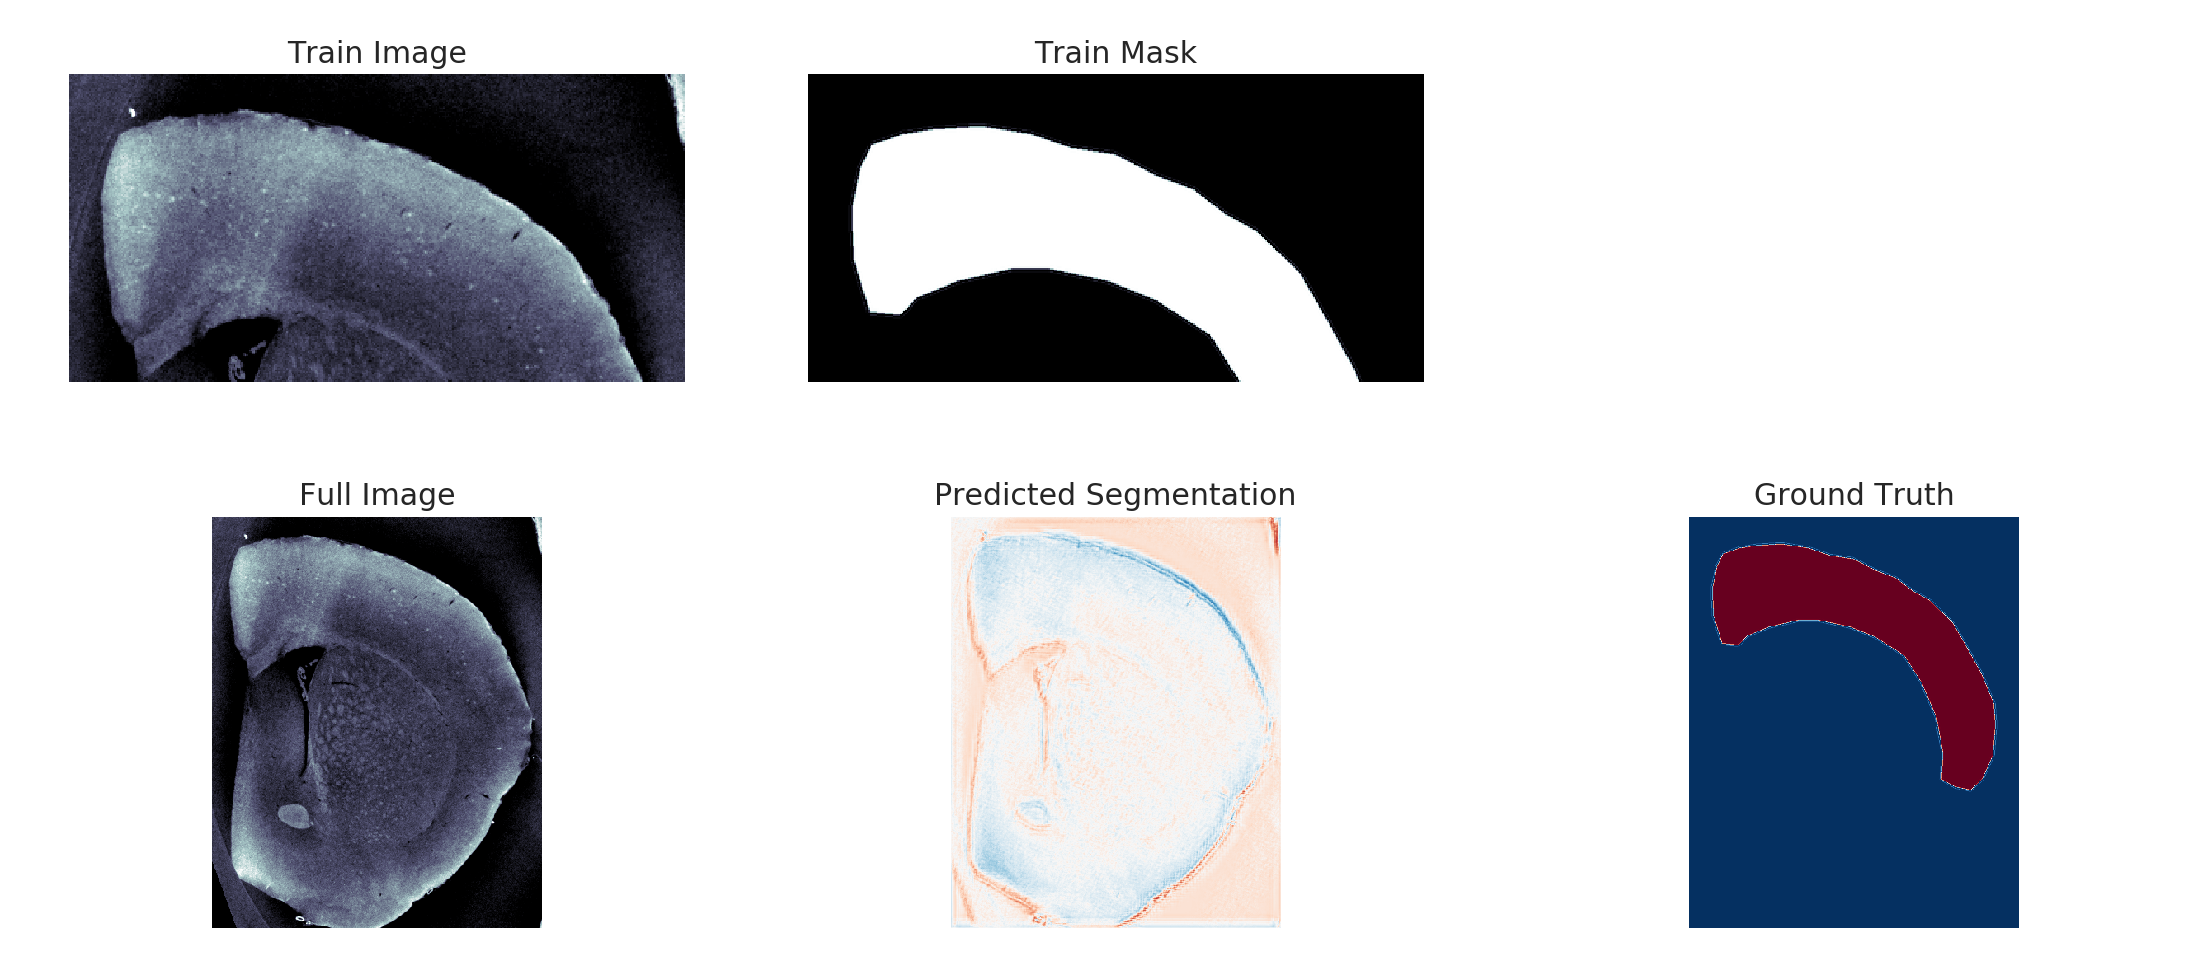

In [56]:
fig, m_axs = plt.subplots(2, 3, 
                          figsize = (18, 8), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')
unet_pred = t_unet.predict(prep_img(cortex_img))[0, :, :, 0]
ax4.imshow(unet_pred, 
           cmap = 'RdBu_r', vmin = 0, vmax = 1)
ax4.set_title('Predicted Segmentation');

ax5.imshow(cortex_mask, 
           cmap = 'RdBu_r')
ax5.set_title('Ground Truth');

# Note
This is a very bad way to train a model, the loss function is poorly chosen, the optimizer can be improved the learning rate can be changed, the training and validation data **should not** come from the same sample (and **definitely** not the same measurement). The goal is to be aware of these techniques and have a feeling for how they can work for complex problems 

In [ ]:
from keras.optimizers import SGD
t_unet.compile(
    # we use a simple loss metric of mean-squared error to optimize
    loss='mse',
    # we use stochastic gradient descent to optimize
    optimizer=SGD(lr = 0.25),
    # we keep track of the number of pixels correctly classified and the mean absolute error as well
    metrics=['binary_accuracy', 'mae']
)

loss_history = t_unet.fit(prep_img(train_img), prep_mask(train_mask),
          validation_data = (prep_img(valid_img), prep_mask(valid_mask)),
          epochs = 10)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize = (20, 7))
ax1.plot(loss_history.epoch, 
         loss_history.history['mean_absolute_error'], 'r-', label = 'Training')
ax1.plot(loss_history.epoch, 
         loss_history.history['val_mean_absolute_error'], 'b-', label = 'Validation')
ax1.set_title('Mean Absolute Error')
ax1.legend()

ax2.plot(loss_history.epoch, 
         100*np.array(loss_history.history['binary_accuracy']), 'r-', label = 'Training')
ax2.plot(loss_history.epoch, 
         100*np.array(loss_history.history['val_binary_accuracy']), 'b-', label = 'Validation')
ax2.set_title('Classification Accuracy (%)')
ax2.legend();

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


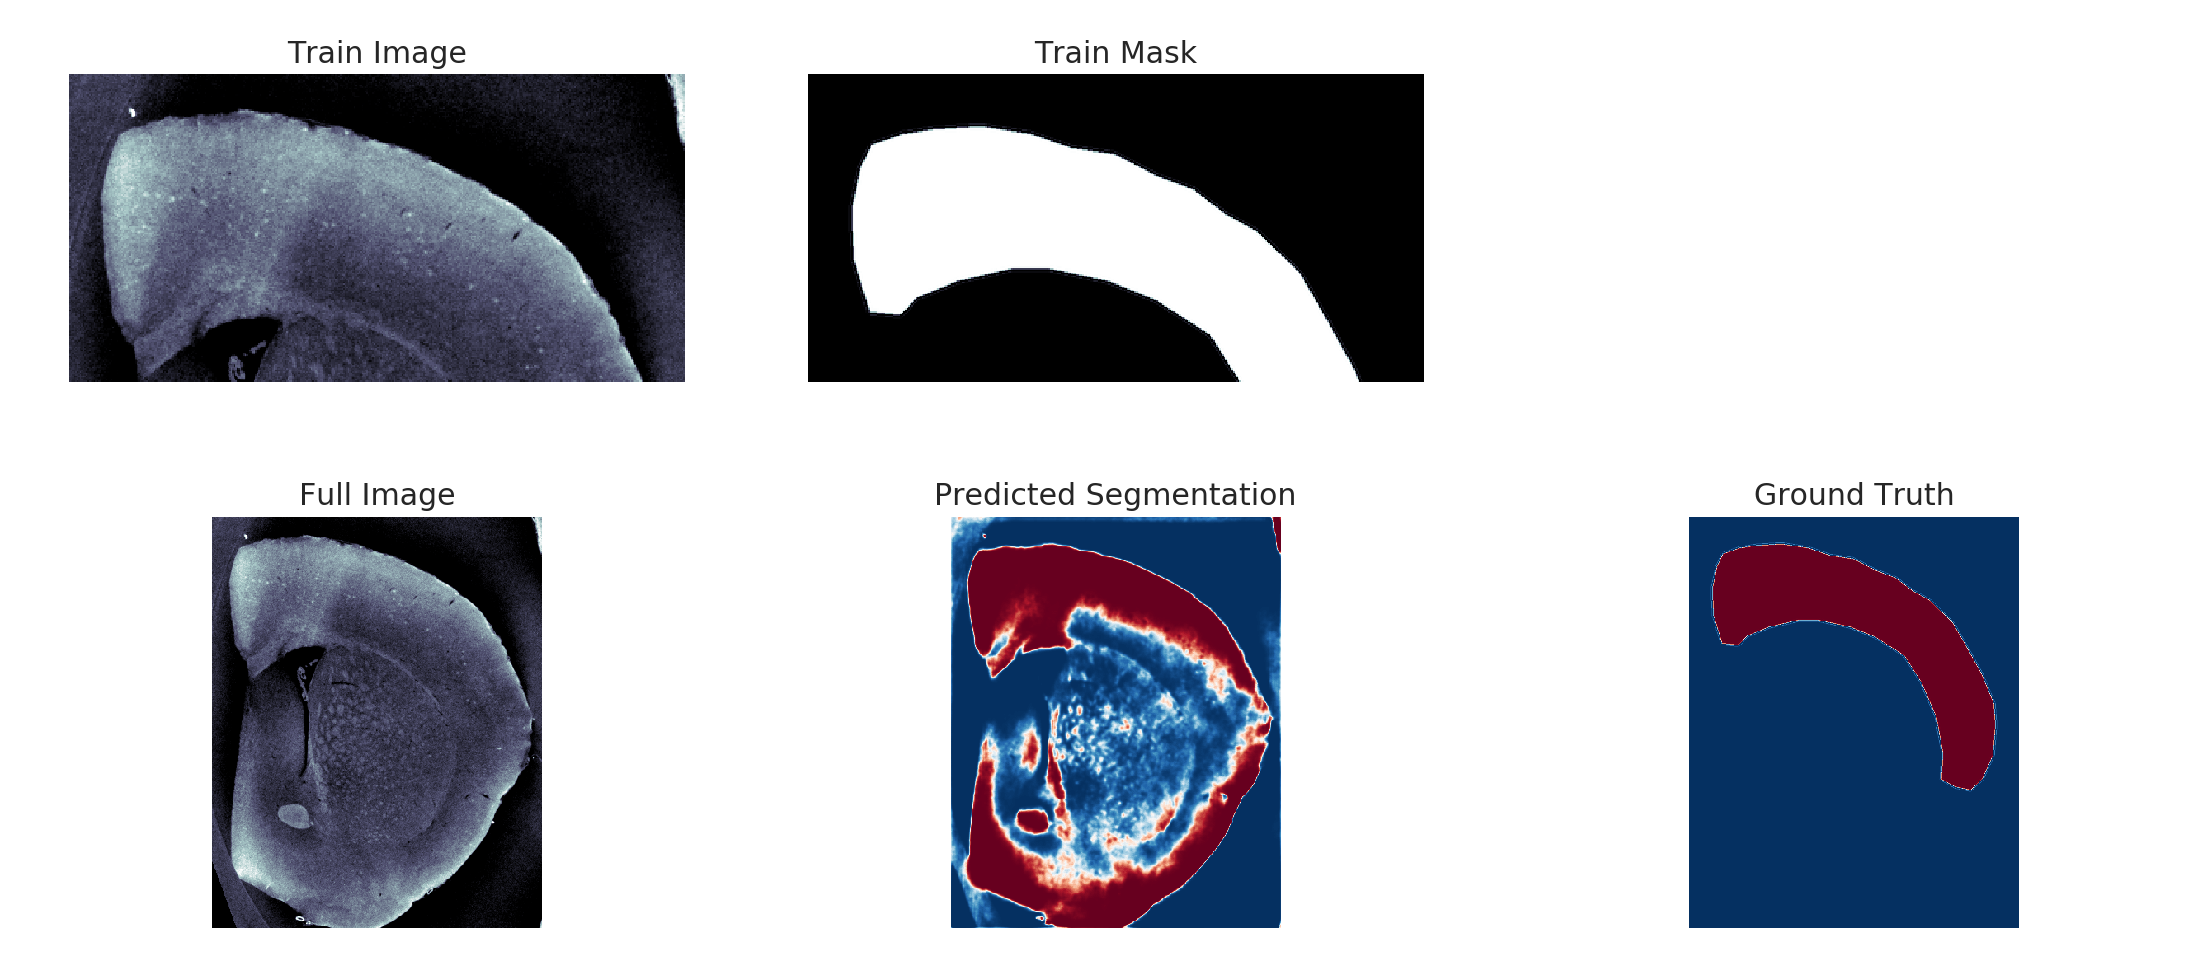

In [59]:
fig, m_axs = plt.subplots(2, 3, 
                          figsize = (18, 8), dpi = 150)
for c_ax in m_axs.flatten(): c_ax.axis('off')
((ax1, ax2, _), (ax3, ax4, ax5)) = m_axs
ax1.imshow(train_img, cmap = 'bone')
ax1.set_title('Train Image')
ax2.imshow(train_mask, cmap = 'bone')
ax2.set_title('Train Mask')

ax3.imshow(cortex_img, cmap = 'bone')
ax3.set_title('Full Image')
unet_pred = t_unet.predict(prep_img(cortex_img))[0, :, :, 0]
ax4.imshow(unet_pred, 
           cmap = 'RdBu_r', vmin = 0, vmax = 1)
ax4.set_title('Predicted Segmentation');

ax5.imshow(cortex_mask, 
           cmap = 'RdBu_r')
ax5.set_title('Ground Truth');